# Classification Analysis

Importing Library and G Drive

In [ ]:
pip install sweetviz

In [ ]:
pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from pycaret.classification import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/RoundedOffRatings_Features.csv")
df.head(5)

,Image Name,UE/IO,UE/NW,MW/IO,ULJ/IO,ULJ/NW,IO/LH,NW/IO,NW/ULH,IO/NMH,...,Energy,Correlation,HuM1,HuM2,HuM3,HuM4,HuM5,HuM6,HuM7,Rating
0,AM218.jpg,1.981239,2.836753,1.339132,1.344277,1.924745,2.119258,0.698418,2.810133,3.296268,...,0.267573,0.994363,3.008452,7.453705,11.847560,11.061994,-22.518465,-14.789184,-23.571473,4.5
1,AM1948.jpg,1.833635,2.929858,1.270414,1.030303,1.646262,3.002603,0.625844,3.437585,1.994821,...,0.356354,0.987348,2.939510,7.042255,12.052818,12.672708,-25.051330,-16.236641,-25.611590,3.5
2,AM1946.jpg,1.933288,2.395209,1.465257,1.564513,1.938322,1.566378,0.807148,2.495686,2.343096,...,0.294714,0.991391,2.981613,7.460082,10.863173,10.597546,-21.330205,-14.364314,-22.316672,3.5
3,AM214.jpg,1.882761,2.341275,1.431507,1.531422,1.904373,2.315791,0.804161,3.459990,2.684211,...,0.149893,0.976310,2.748384,6.986360,9.662708,9.387926,18.942285,12.945501,19.364469,2.5
4,AM1939.jpg,1.937528,2.324811,1.584223,1.333695,1.600281,3.693109,0.833413,4.915896,3.172618,...,0.360506,0.990929,3.042141,8.100464,11.354806,10.838226,-22.403855,-15.233655,21.961341,4.0


In [ ]:
df.dtypes

Image Name      object
UE/IO          float64
UE/NW          float64
MW/IO          float64
ULJ/IO         float64
ULJ/NW         float64
IO/LH          float64
NW/IO          float64
NW/ULH         float64
IO/NMH         float64
EBN/NJ         float64
IO/NW          float64
LEL            float64
LLL            float64
UEB            float64
UL             float64
Nose           float64
Homogeneity    float64
Contrast       float64
Energy         float64
Correlation    float64
HuM1           float64
HuM2           float64
HuM3           float64
HuM4           float64
HuM5           float64
HuM6           float64
HuM7           float64
Rating         float64
dtype: object

In [ ]:
df.isnull().sum()

Image Name     0
UE/IO          0
UE/NW          0
MW/IO          0
ULJ/IO         0
ULJ/NW         0
IO/LH          0
NW/IO          0
NW/ULH         0
IO/NMH         0
EBN/NJ         0
IO/NW          0
LEL            0
LLL            0
UEB            0
UL             0
Nose           0
Homogeneity    0
Contrast       0
Energy         0
Correlation    0
HuM1           0
HuM2           0
HuM3           0
HuM4           0
HuM5           0
HuM6           0
HuM7           0
Rating         0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UE/IO,5484.0,1.931575,0.085939,1.654372,1.871869,1.929851,1.983179,2.260835
UE/NW,5484.0,2.686236,0.269780,1.886744,2.510915,2.673934,2.847339,3.956836
MW/IO,5484.0,1.403274,0.201141,0.962963,1.259907,1.360281,1.509318,2.260198
ULJ/IO,5484.0,1.300804,0.192667,0.615312,1.173627,1.283649,1.412825,2.234898
ULJ/NW,5484.0,1.799672,0.248474,0.855390,1.642800,1.793583,1.945423,2.889126
IO/LH,5484.0,2.215688,0.539981,1.034237,1.826770,2.167472,2.501739,6.073734
NW/IO,5484.0,0.725670,0.074173,0.475437,0.675418,0.719702,0.767923,1.073166
NW/ULH,5484.0,3.022671,0.653310,1.486418,2.571381,2.936748,3.377549,6.914658
IO/NMH,5484.0,3.038608,0.788665,1.574035,2.524259,2.882953,3.347284,10.597532
EBN/NJ,5484.0,1.437647,0.277201,0.582163,1.244604,1.440510,1.611581,3.163614


EDA

In [ ]:
import sweetviz as sv
eda = sv.analyze(df)
eda.show_html('edal.html')

                                             |          | [  0%]   00:00 -> (? left)

Report edal.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



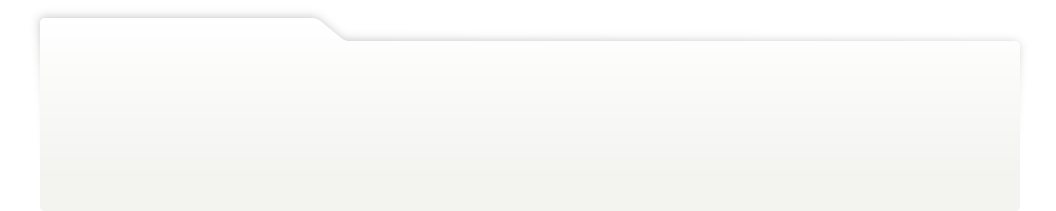
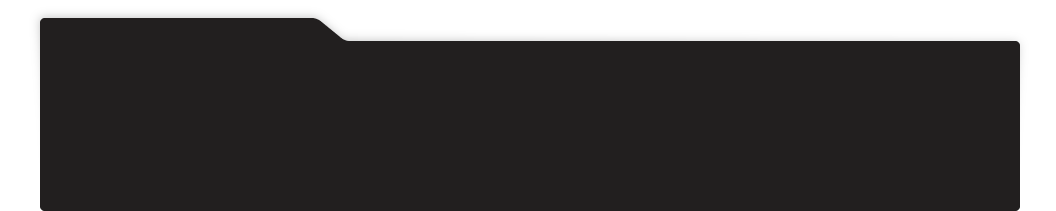
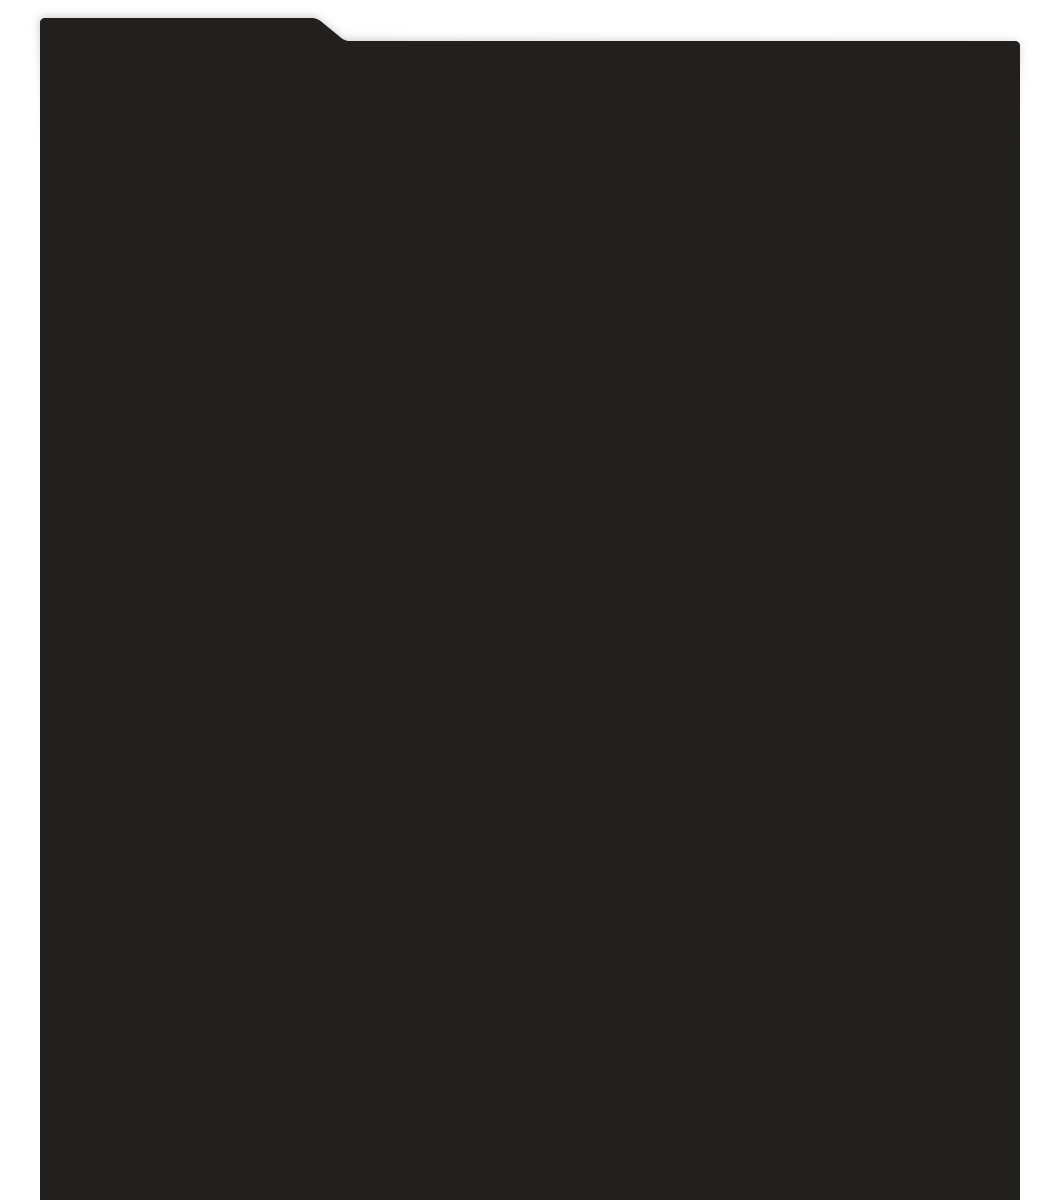
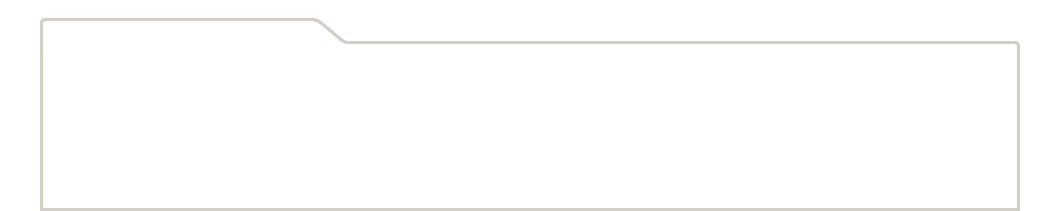
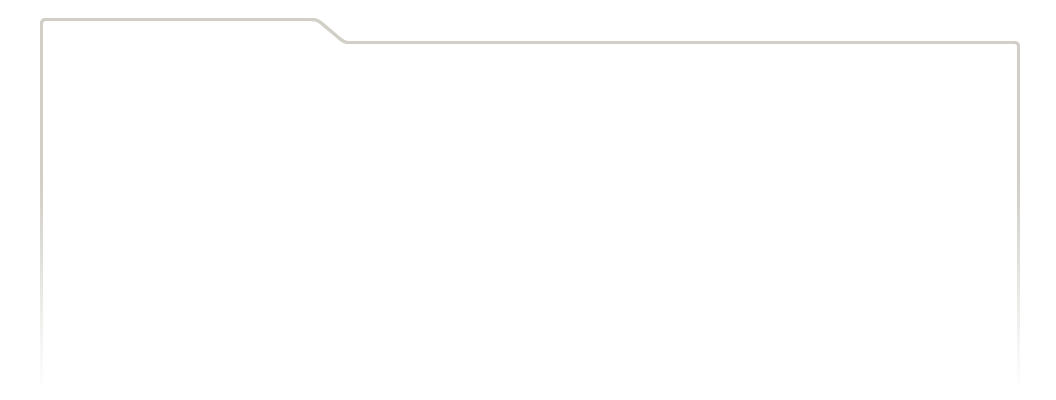
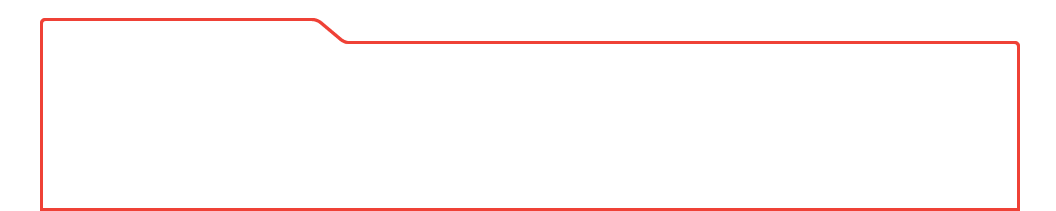
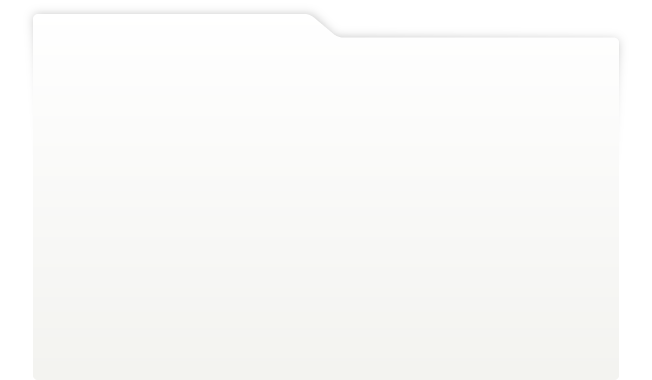
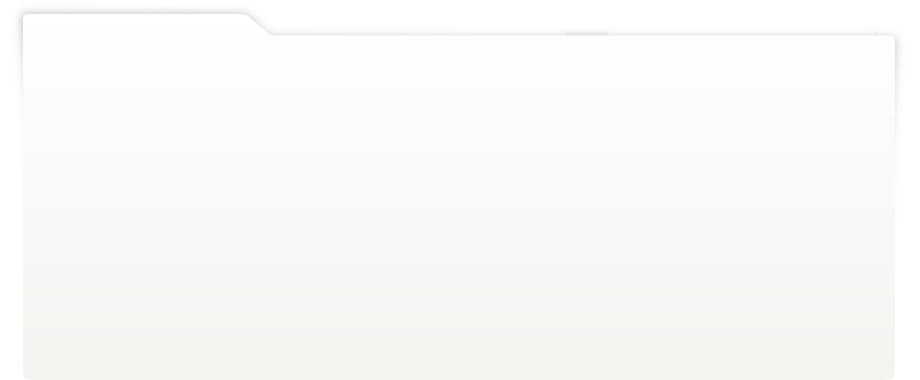
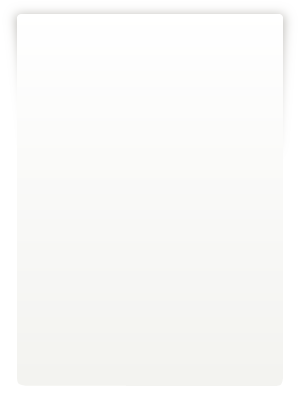
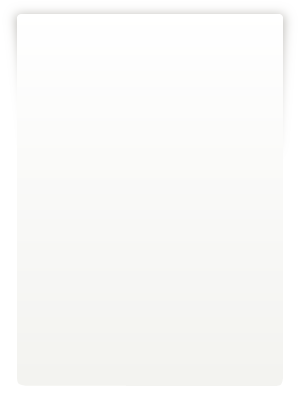
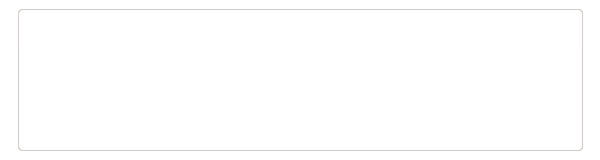
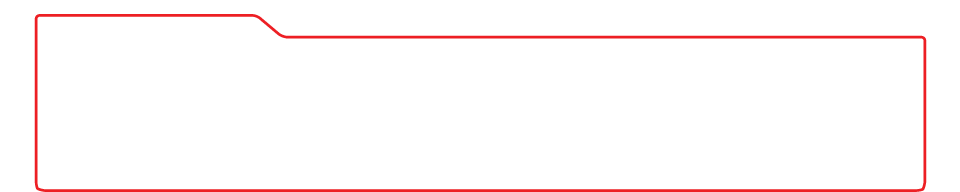
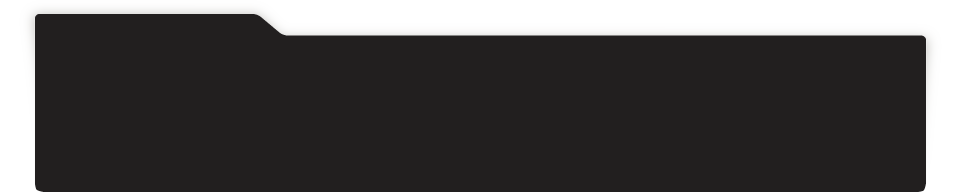
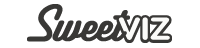
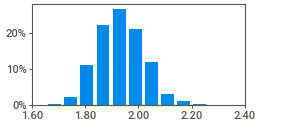
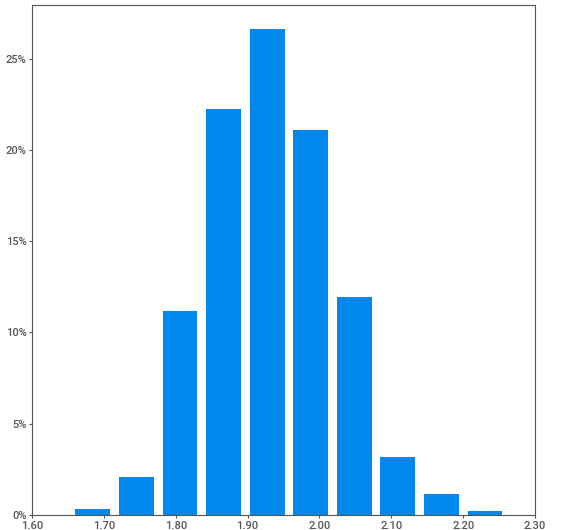
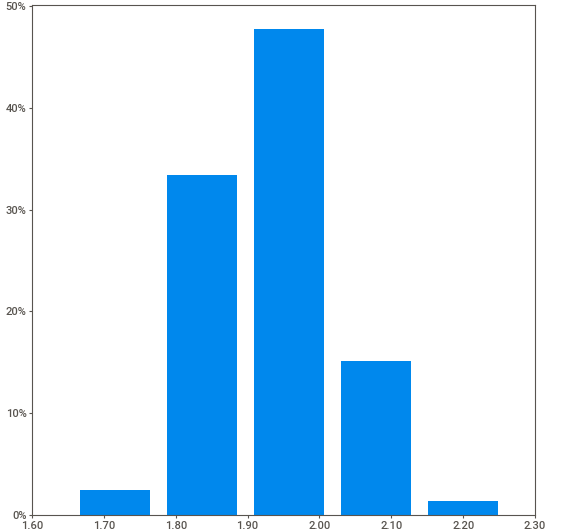
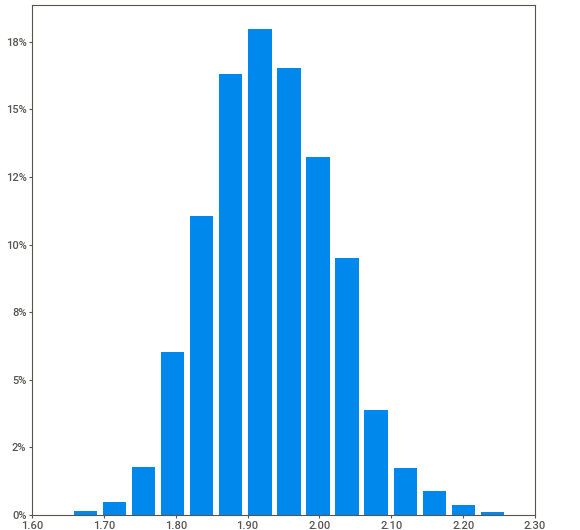
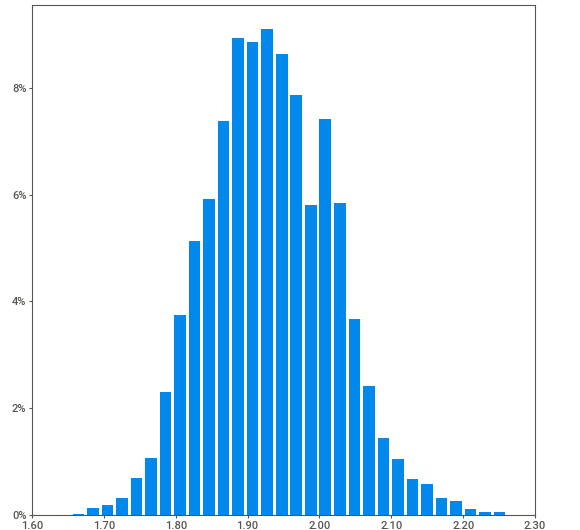
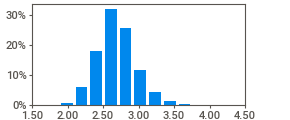
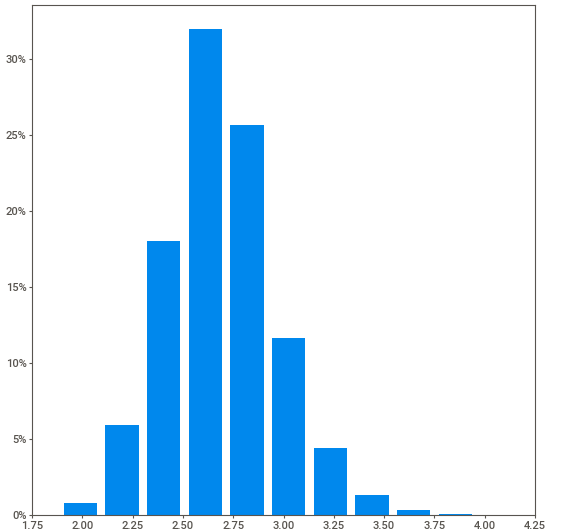
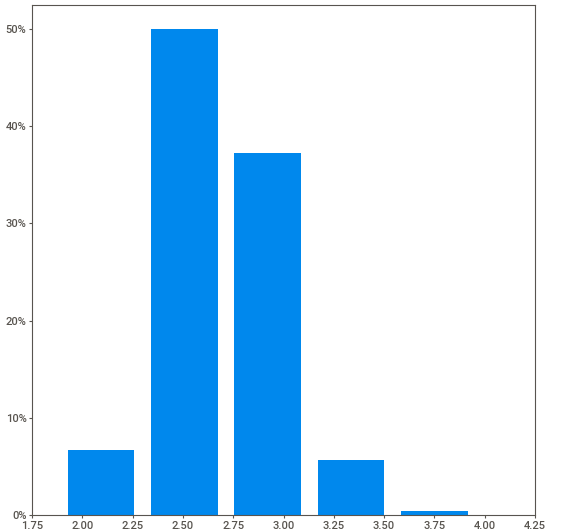
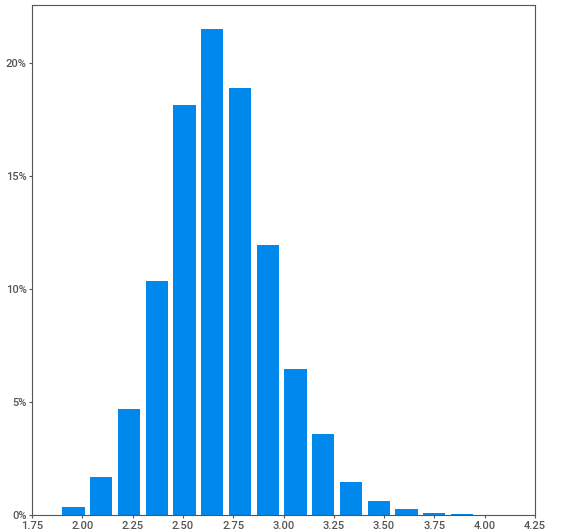
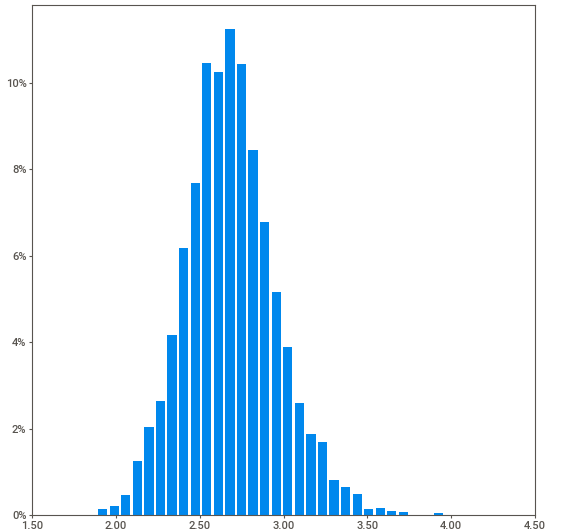
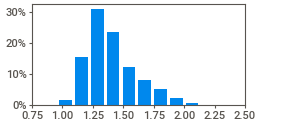
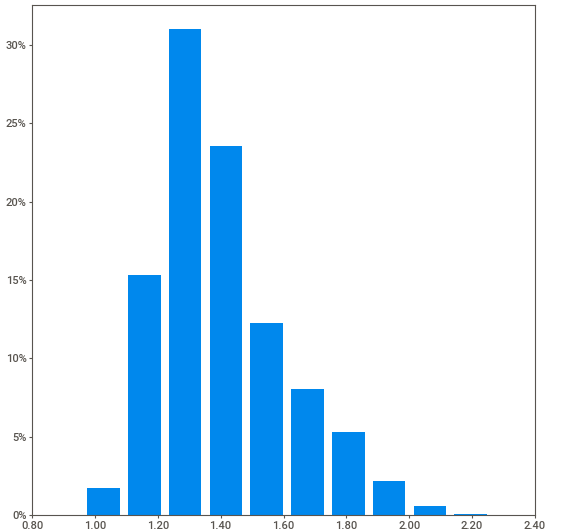
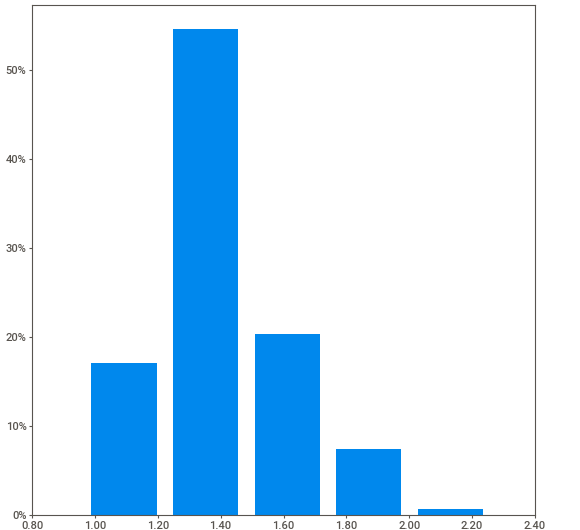
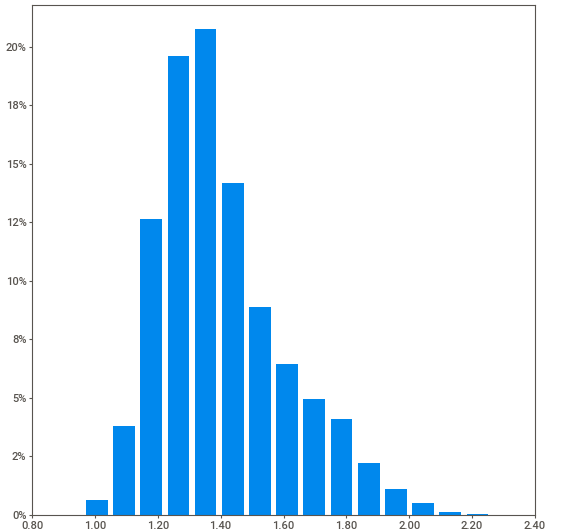
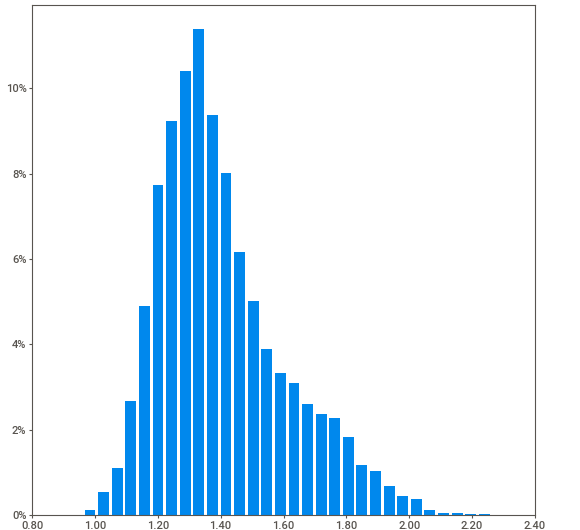
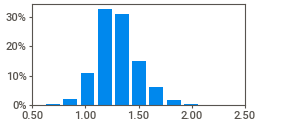
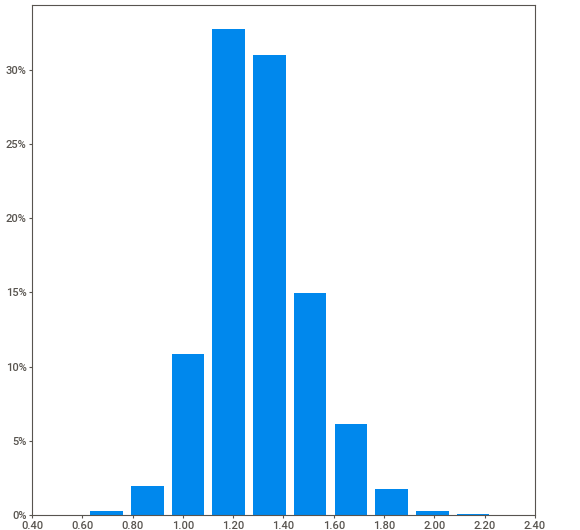
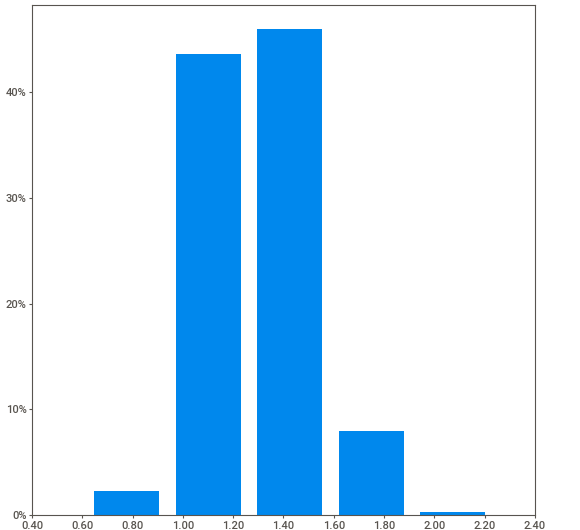
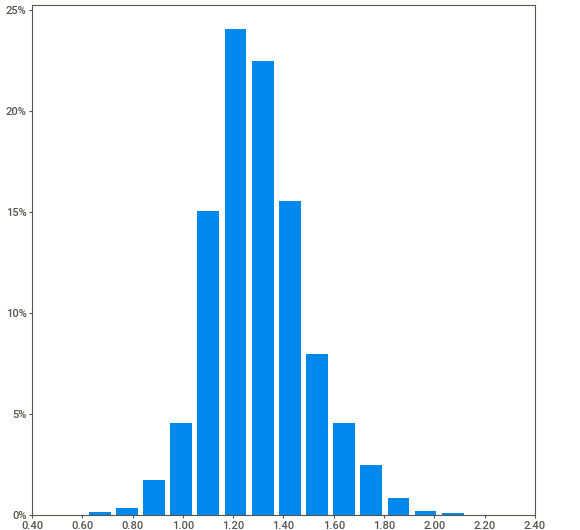
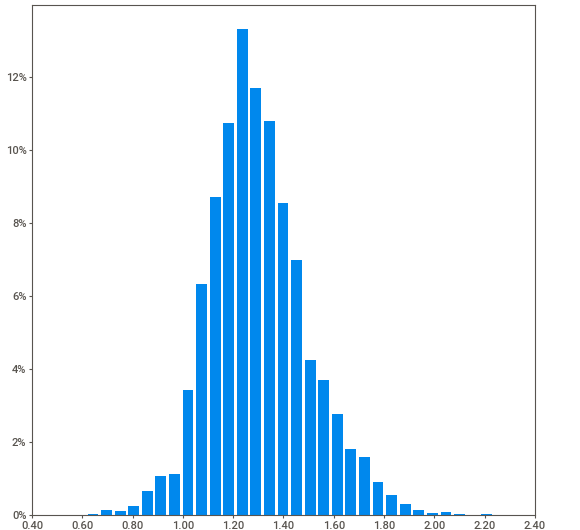
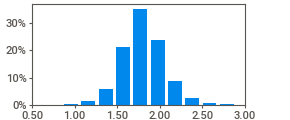
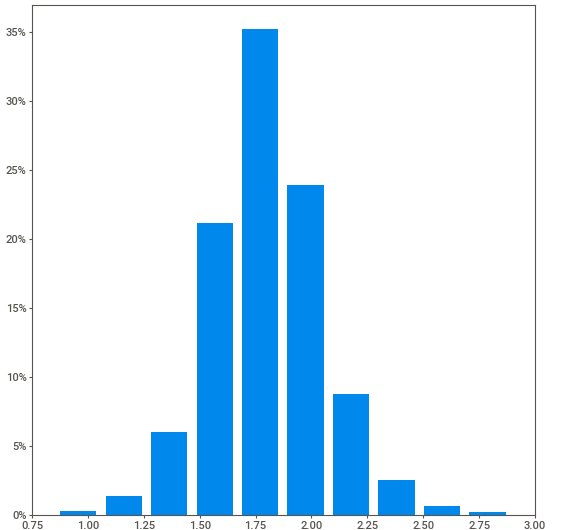
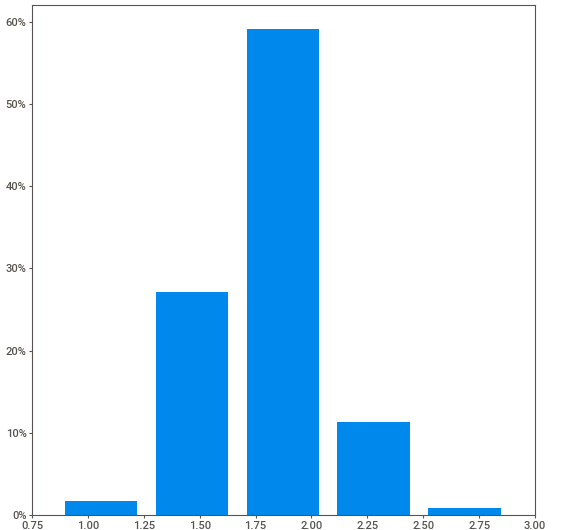
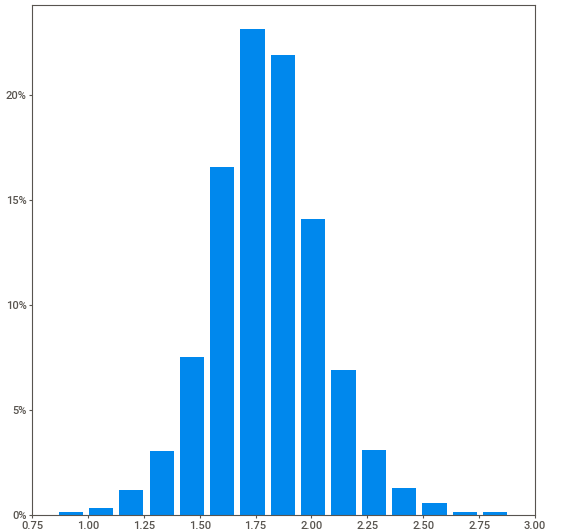
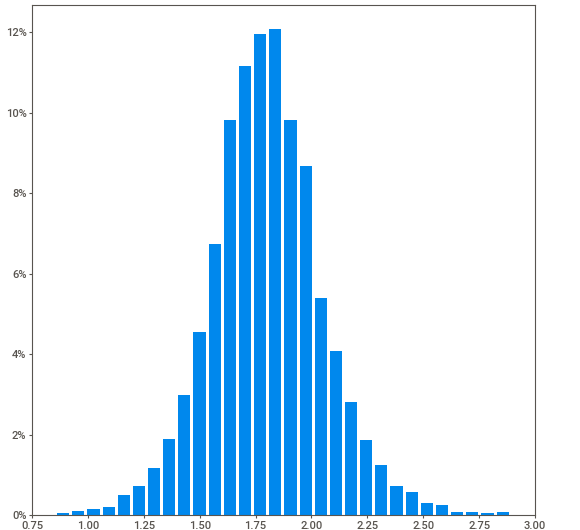
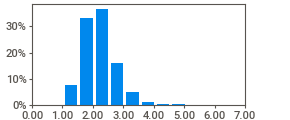
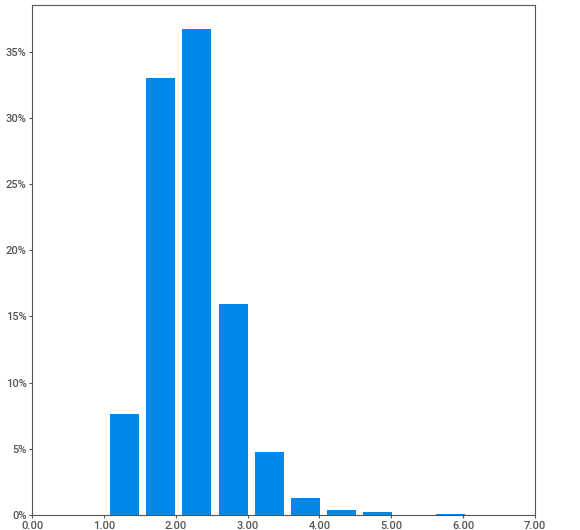
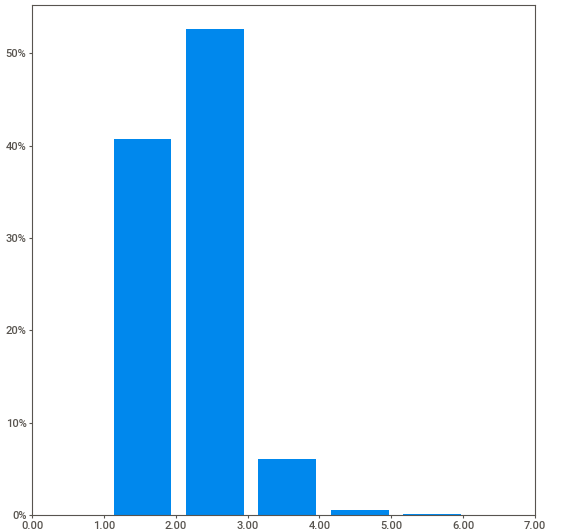
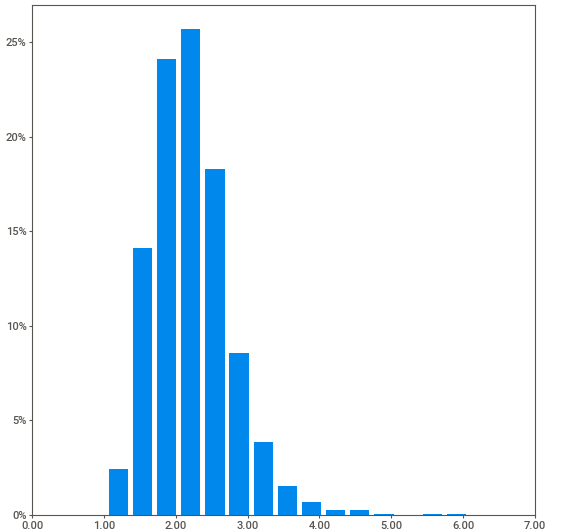
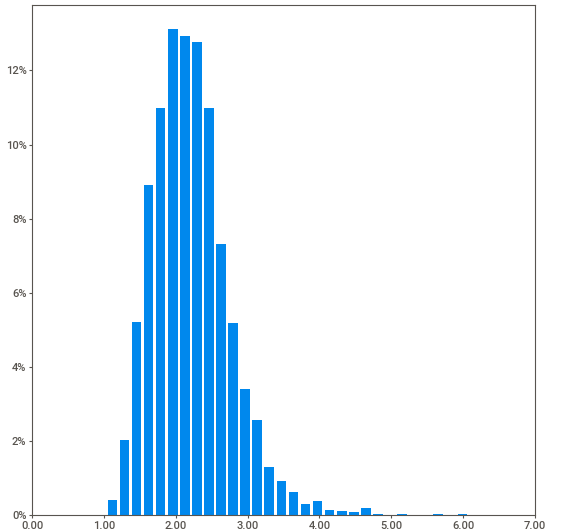
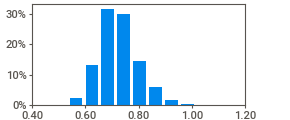
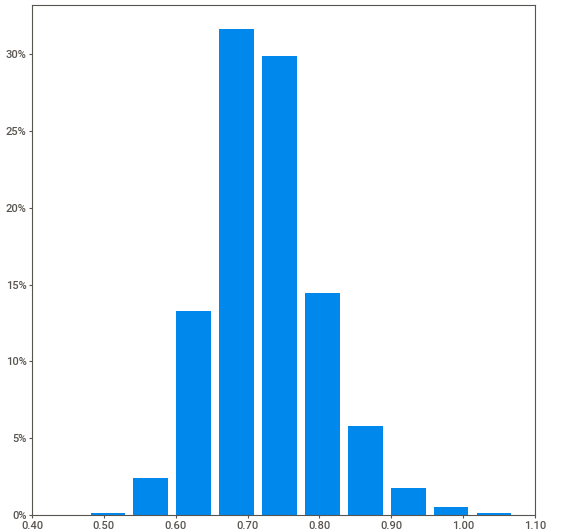
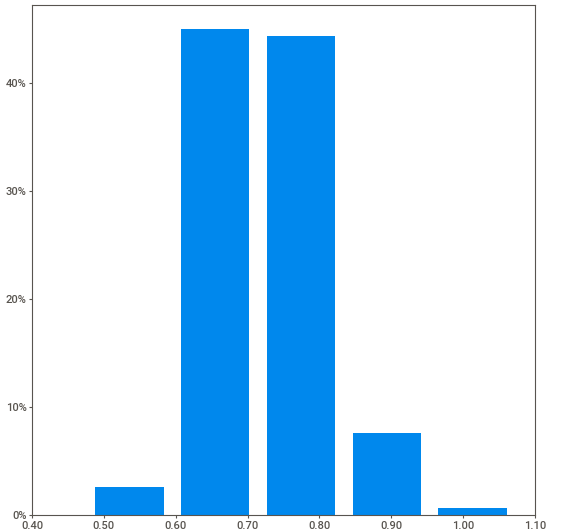
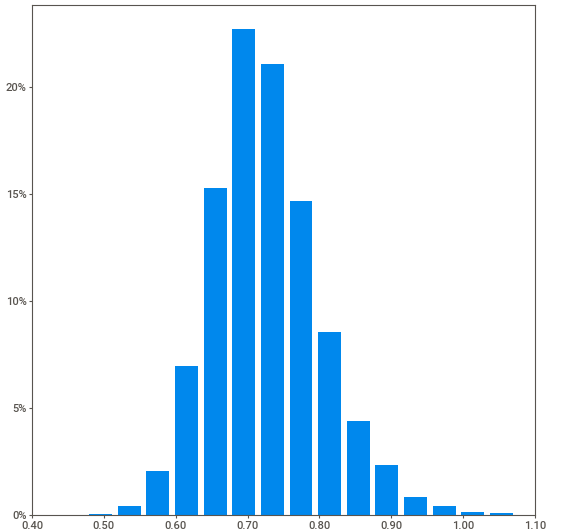
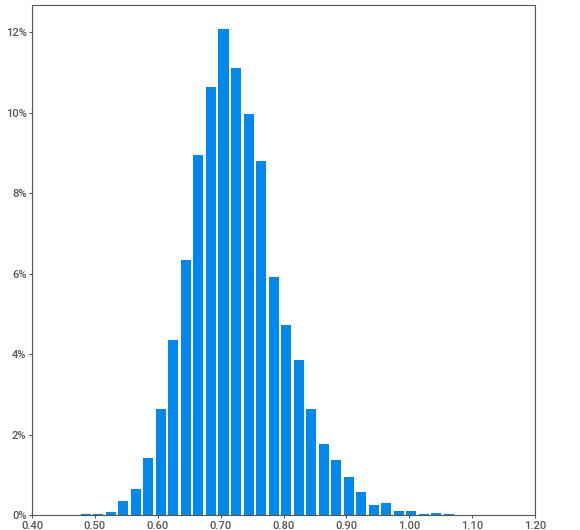
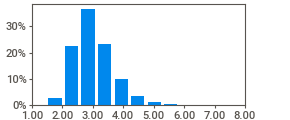
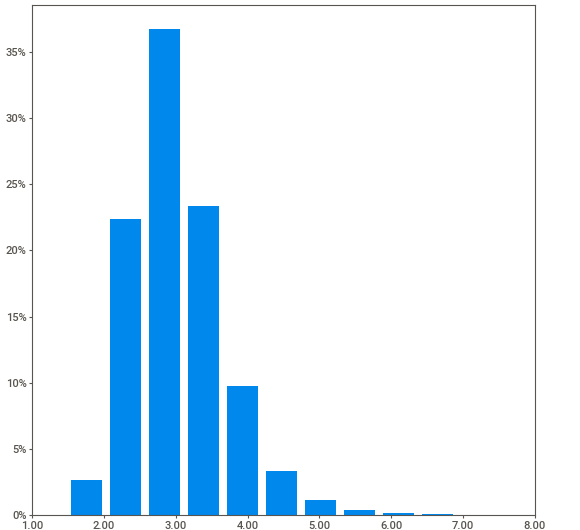
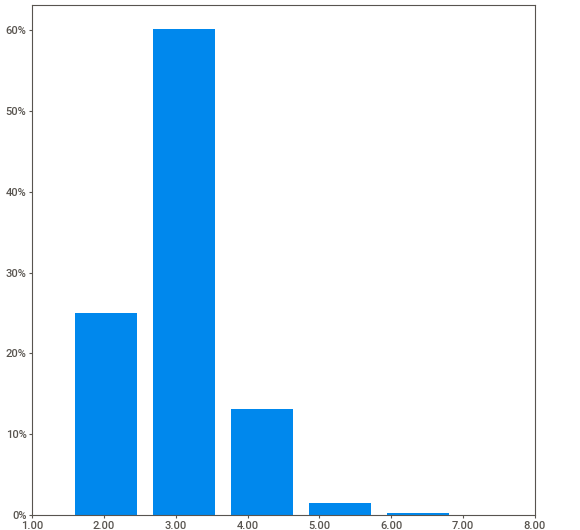
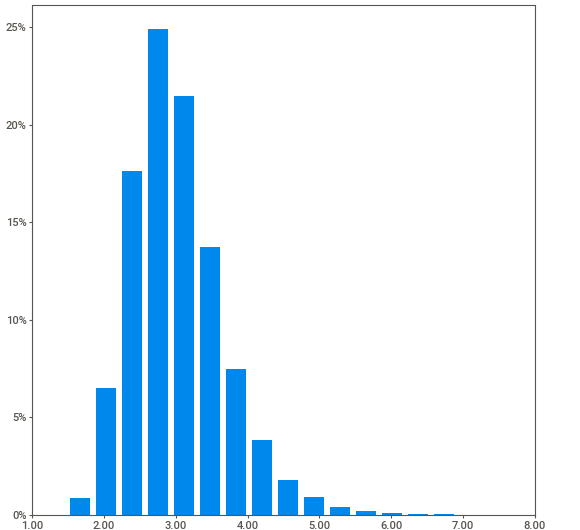
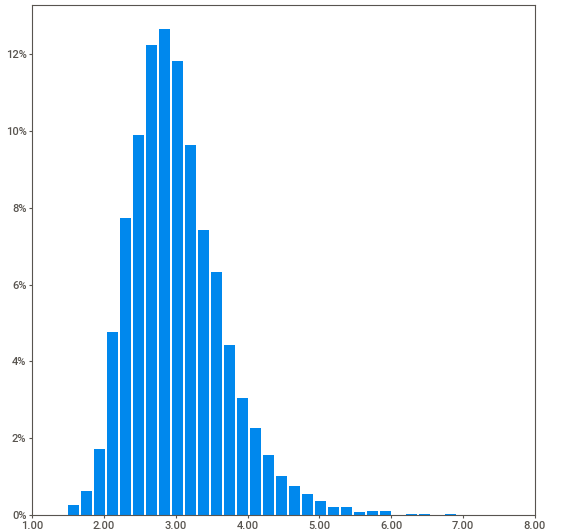
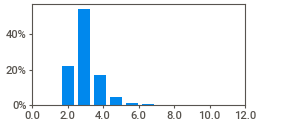
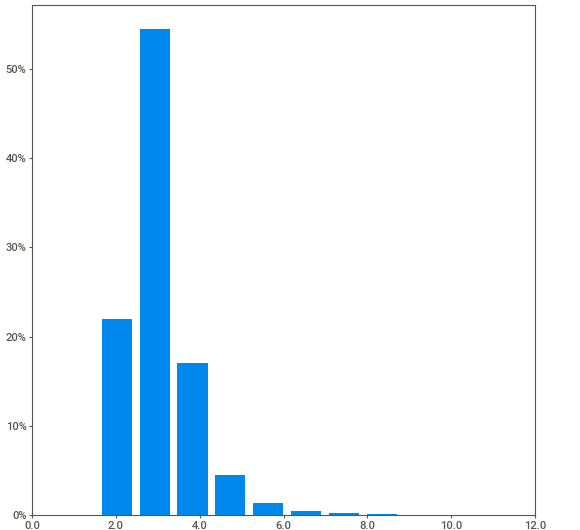
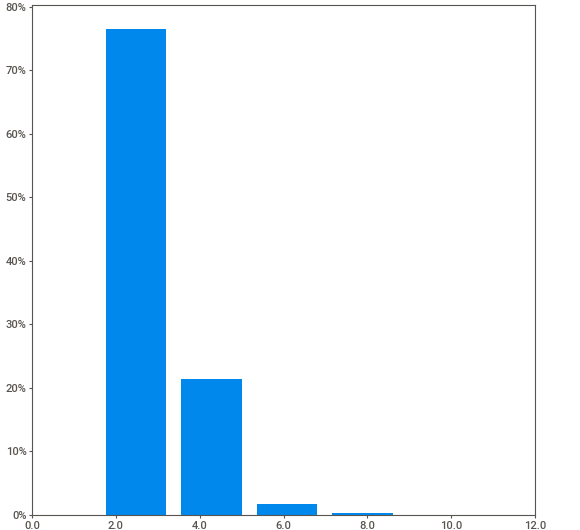
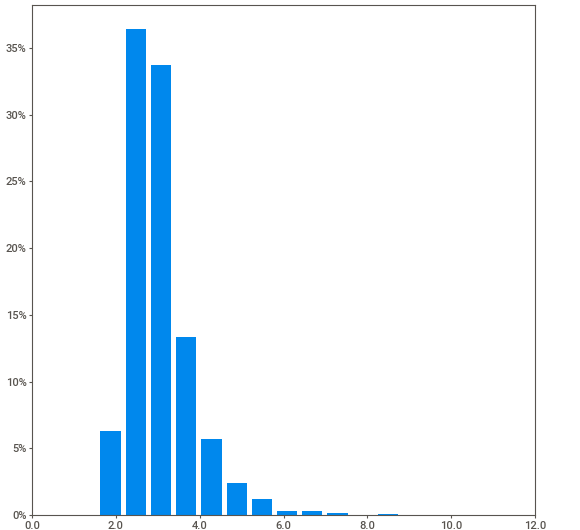
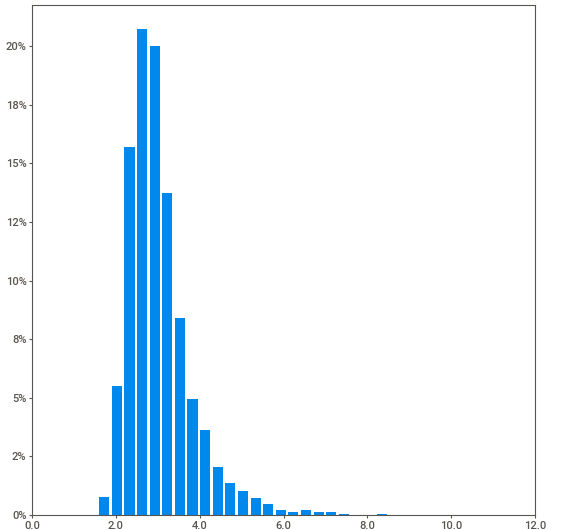
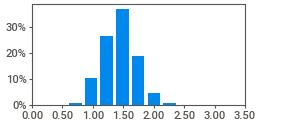
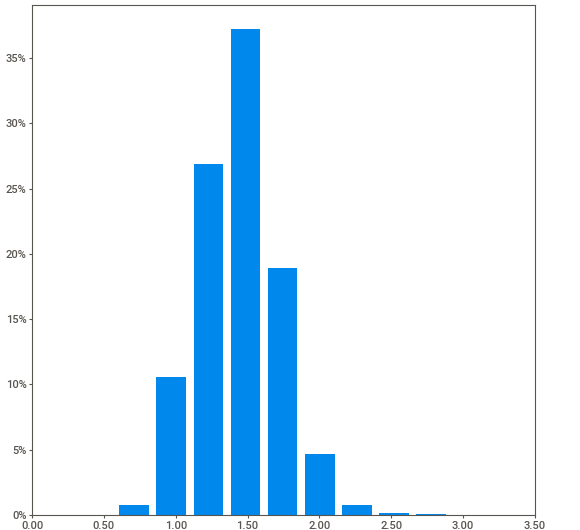
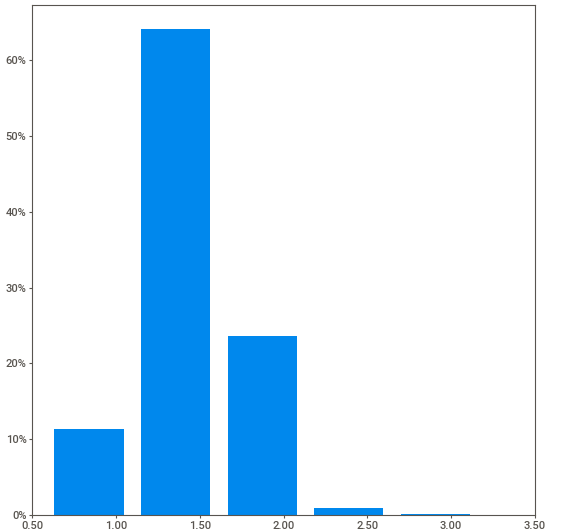
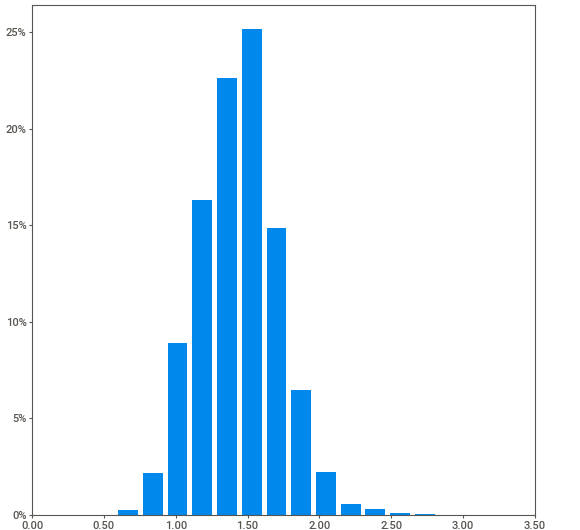
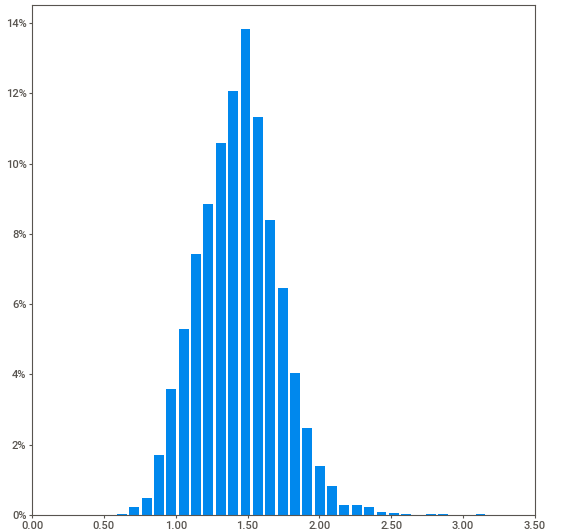
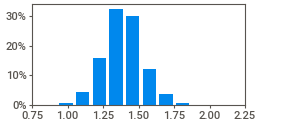
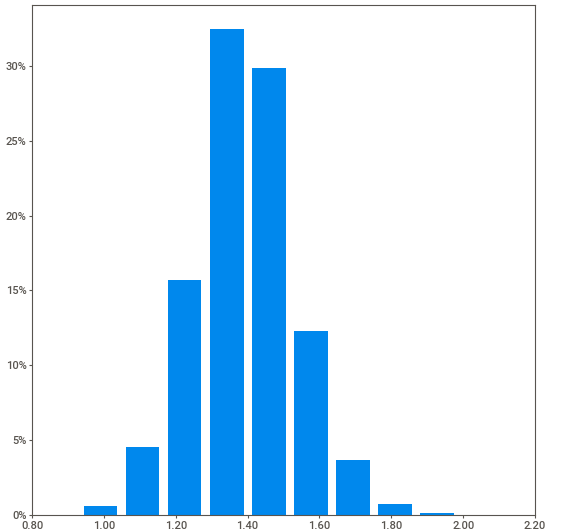
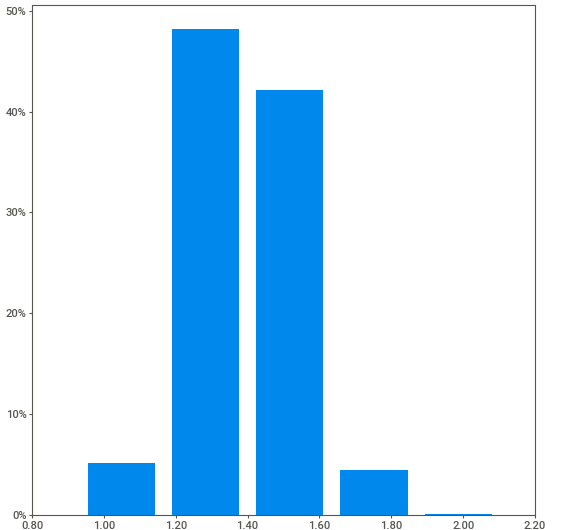
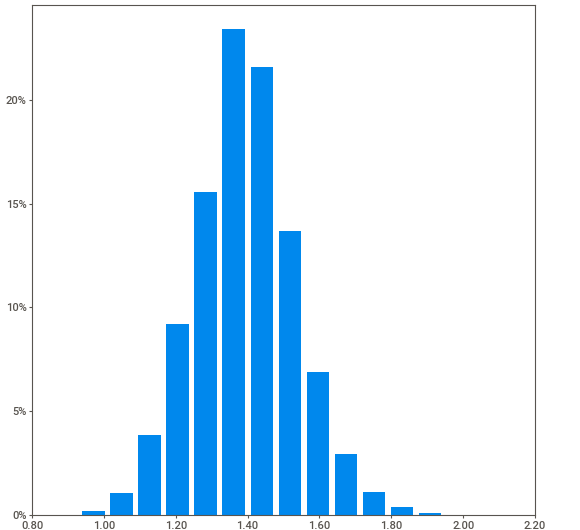
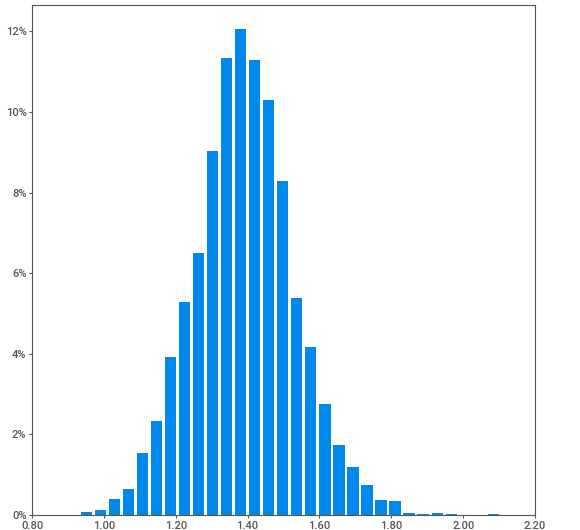
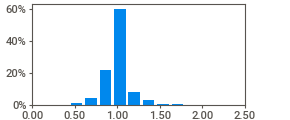
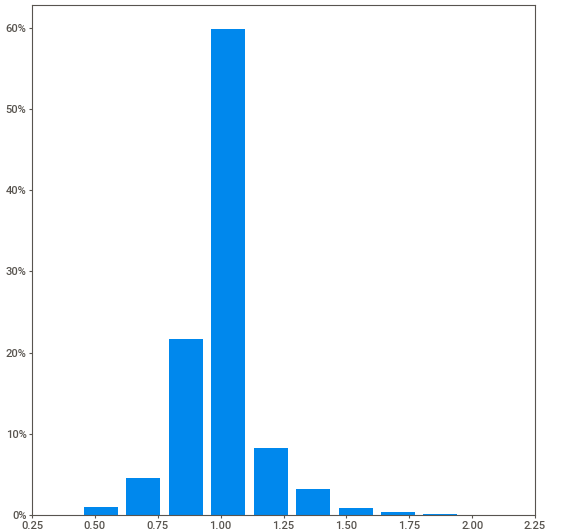
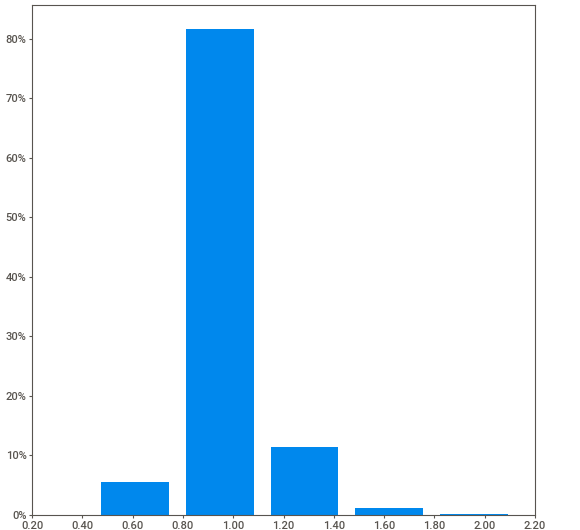
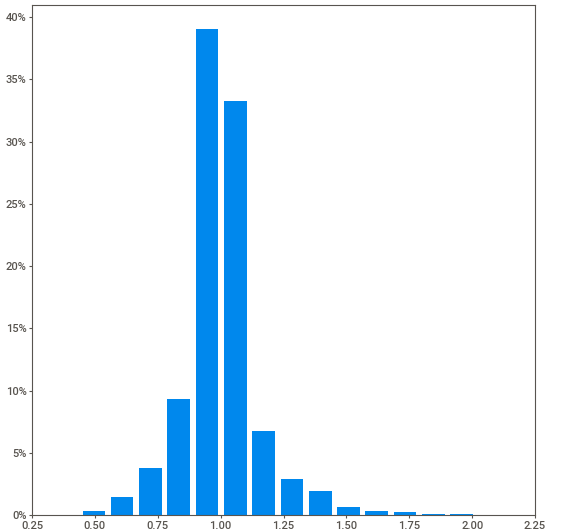
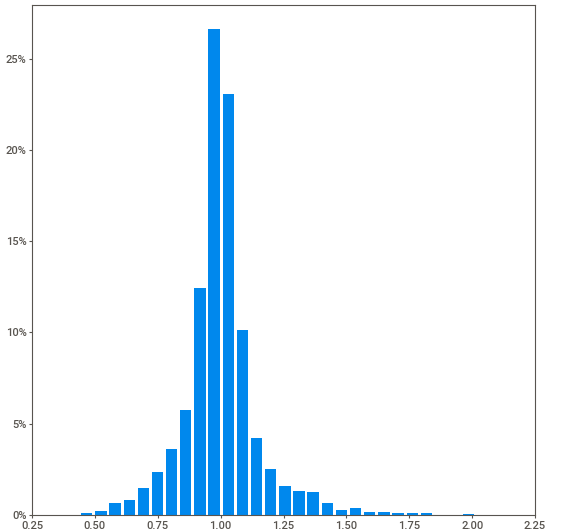
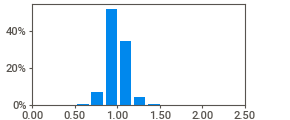
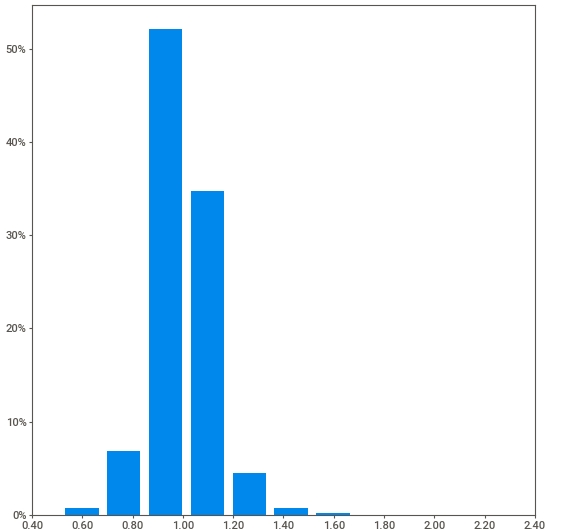
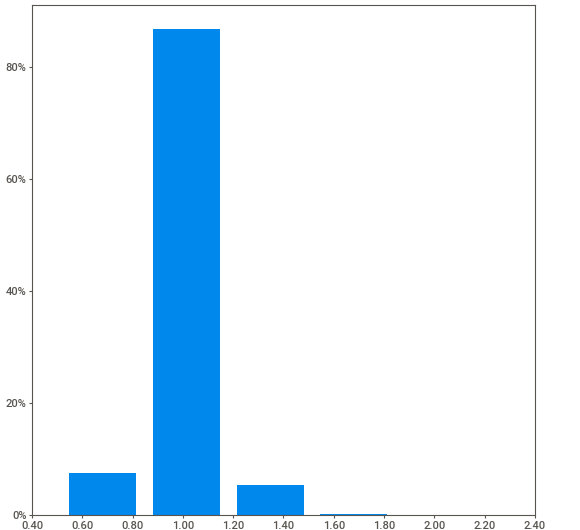
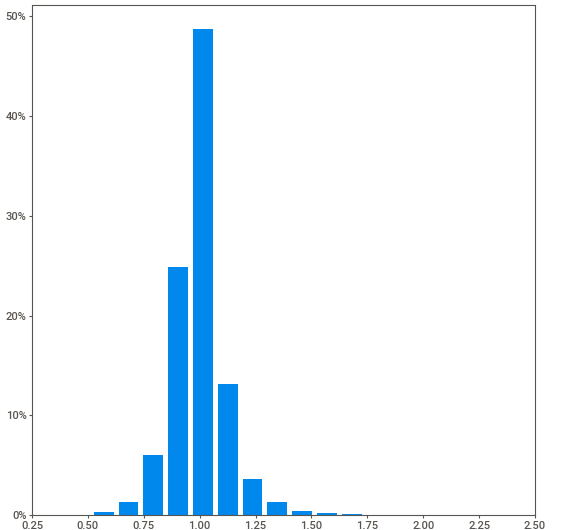
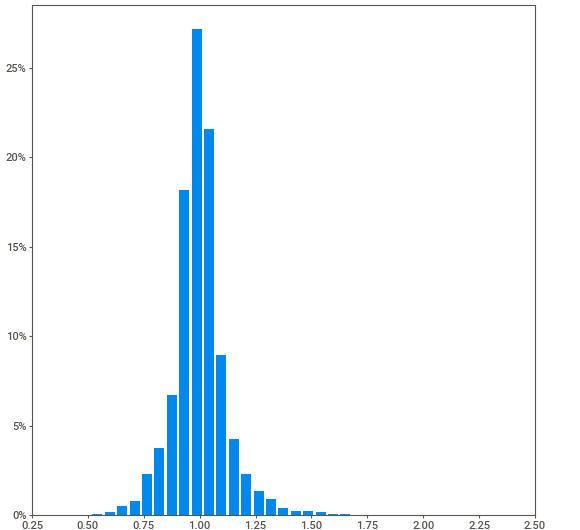
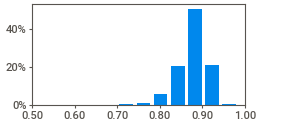
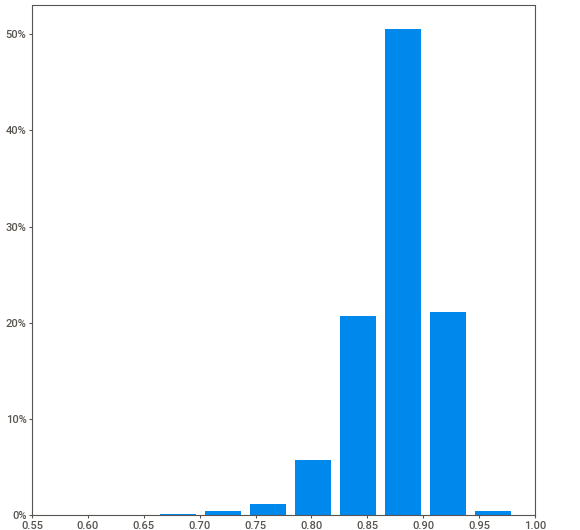
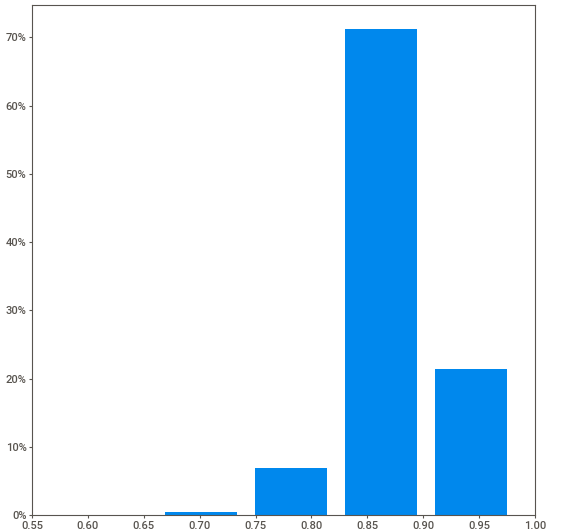
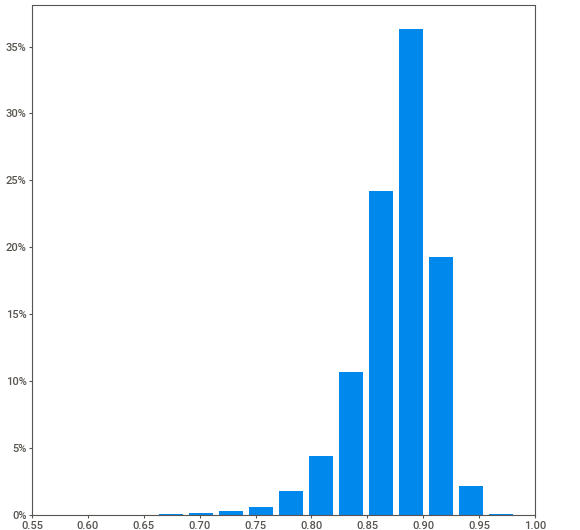
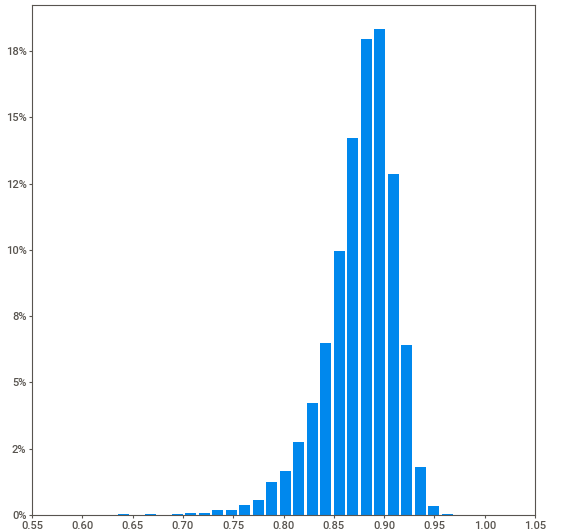
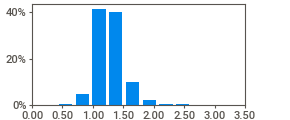
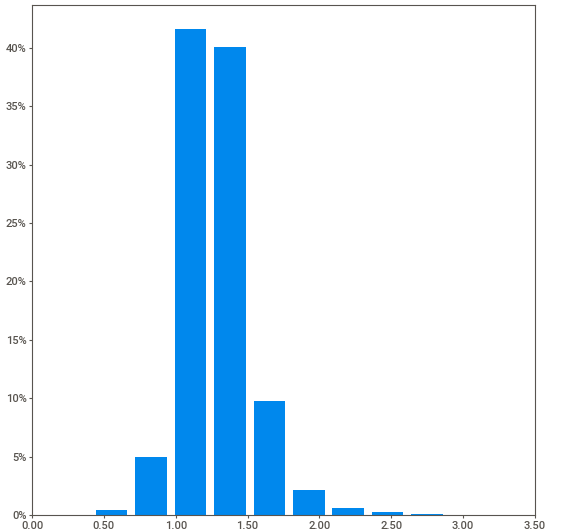
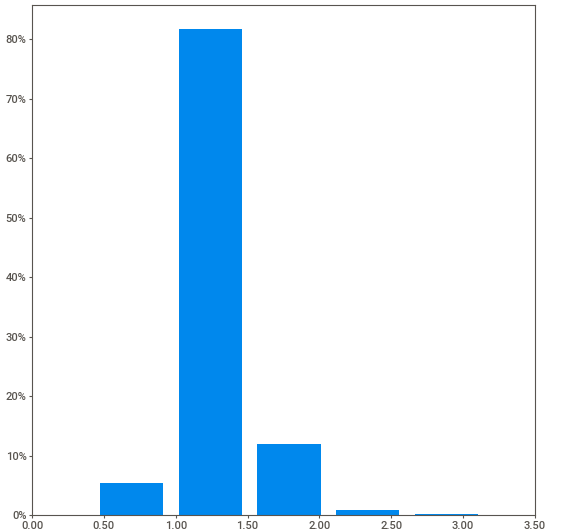
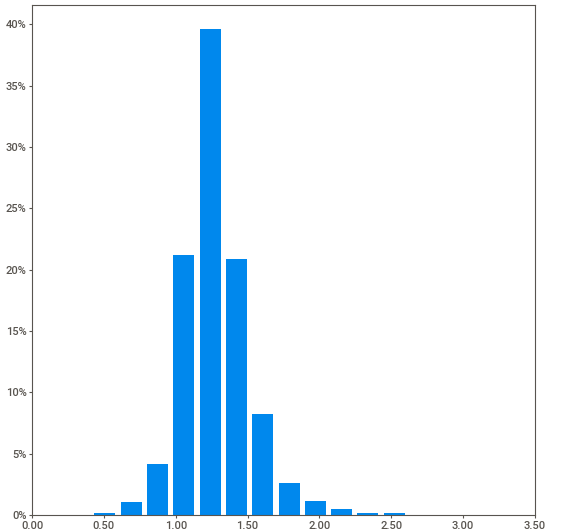
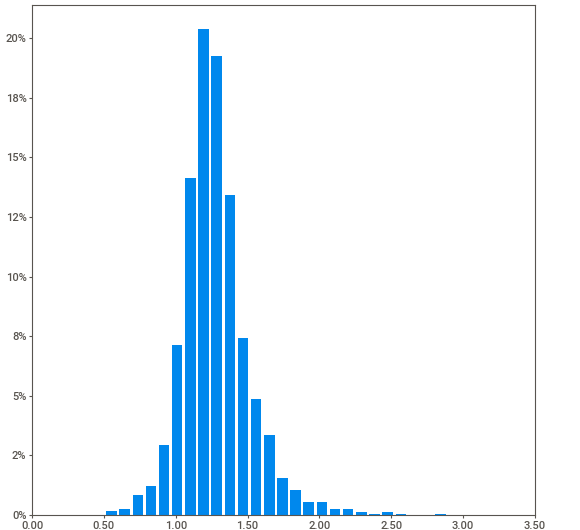
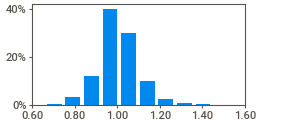
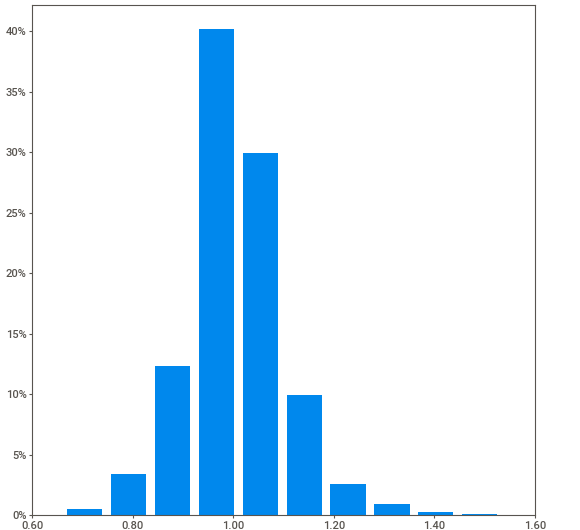
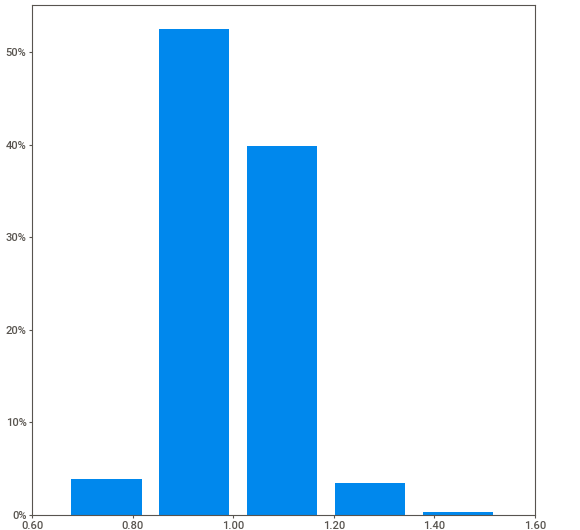
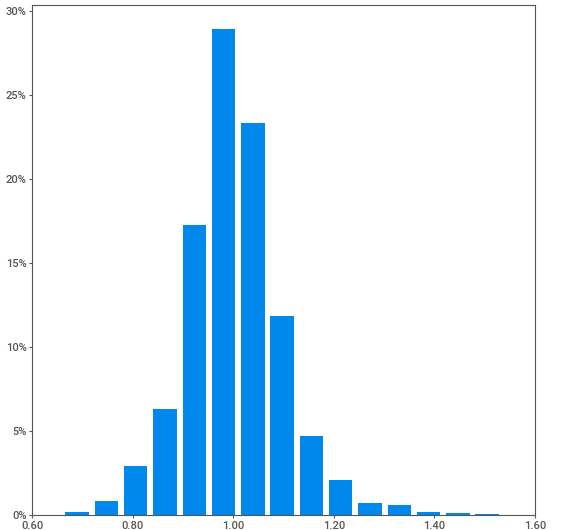
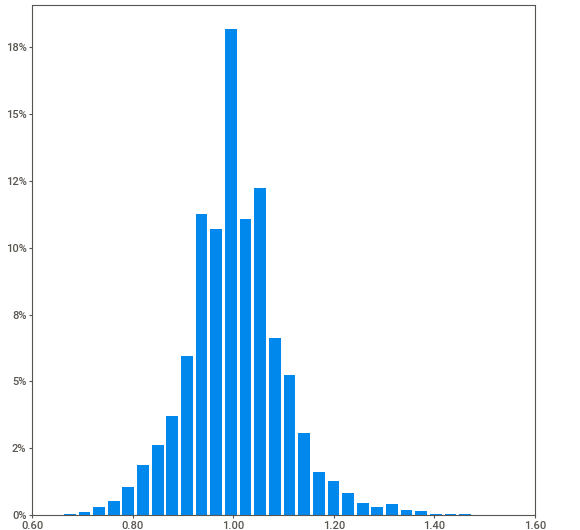
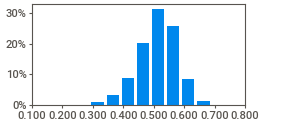
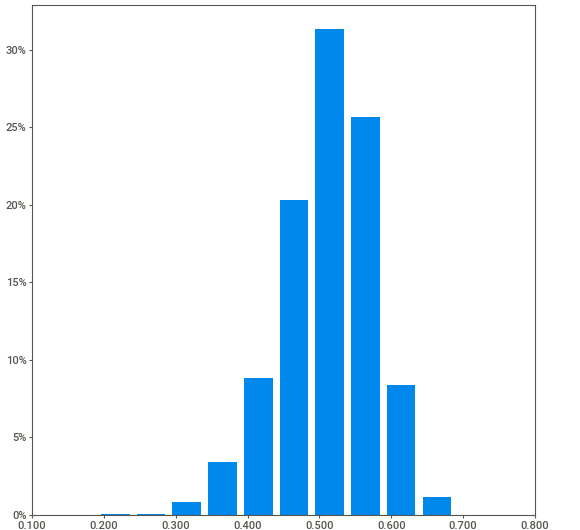
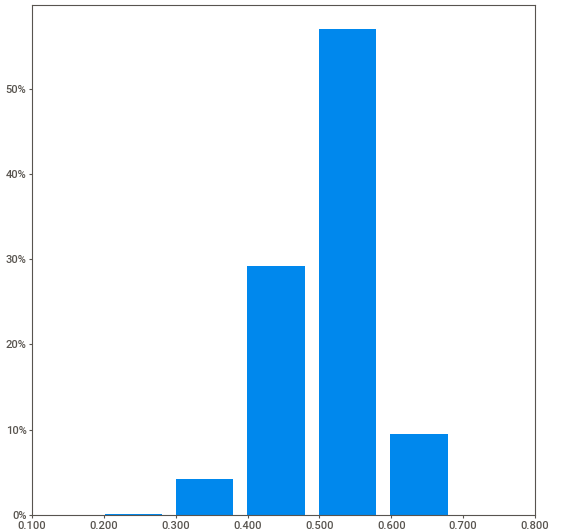
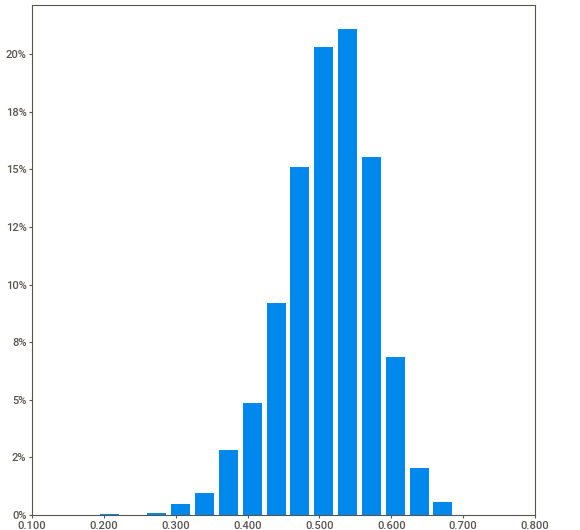
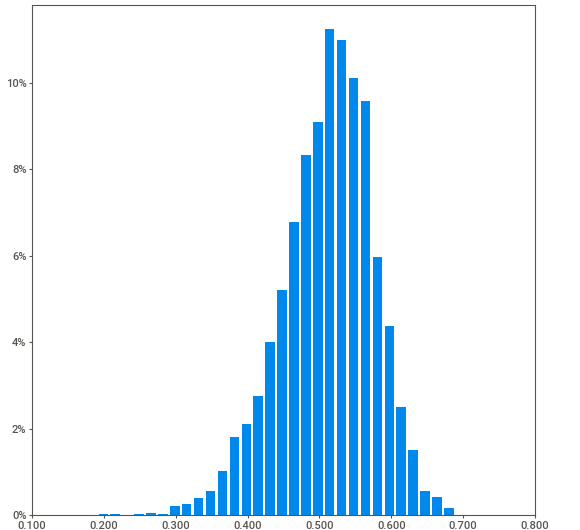
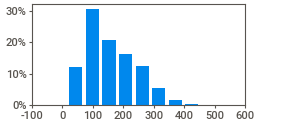
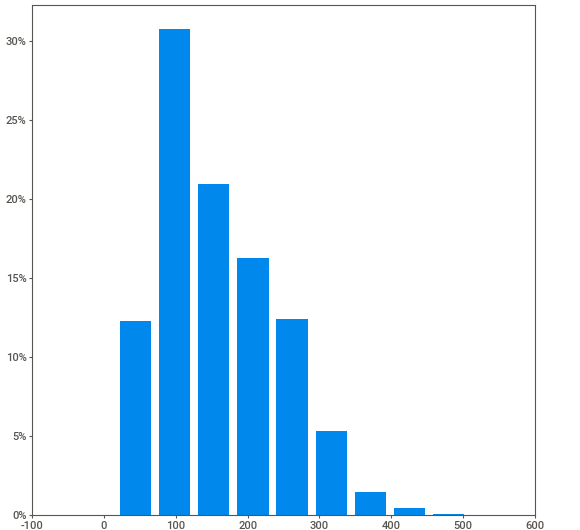
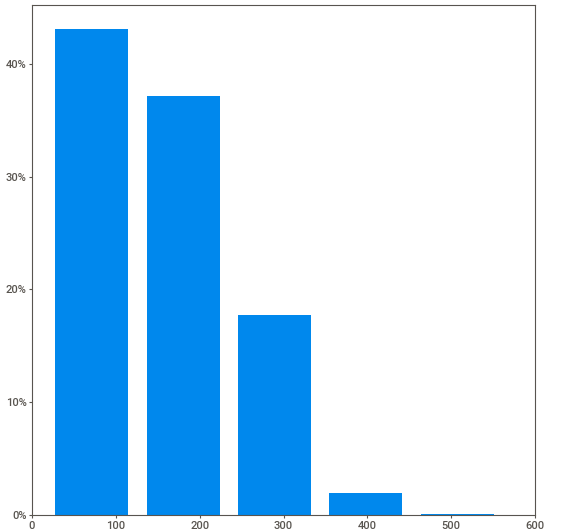
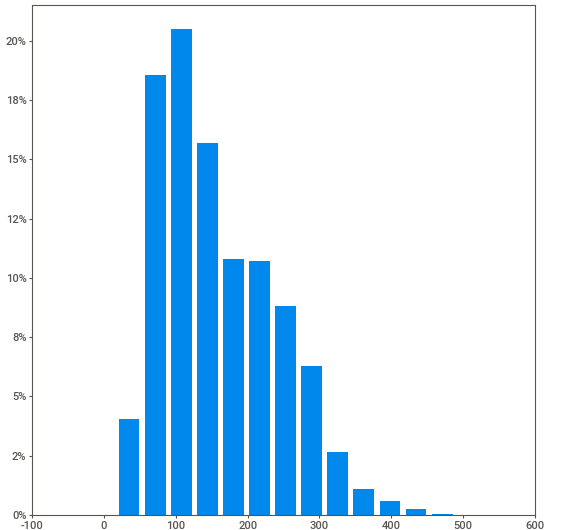
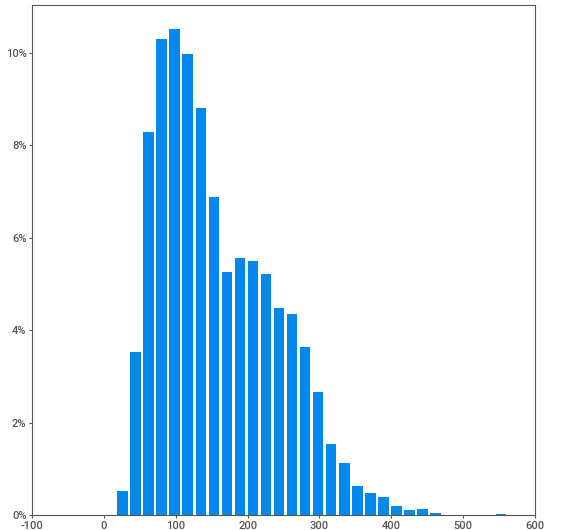
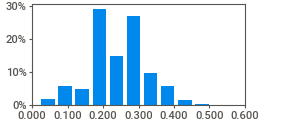
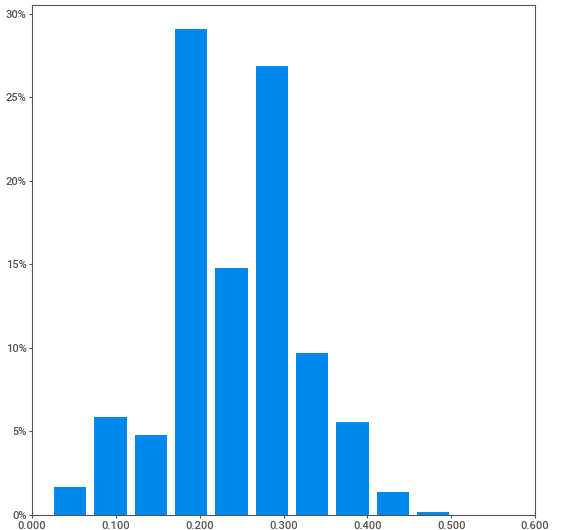
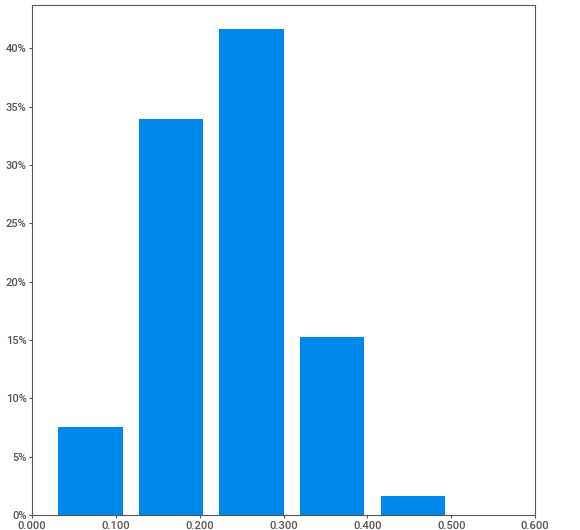
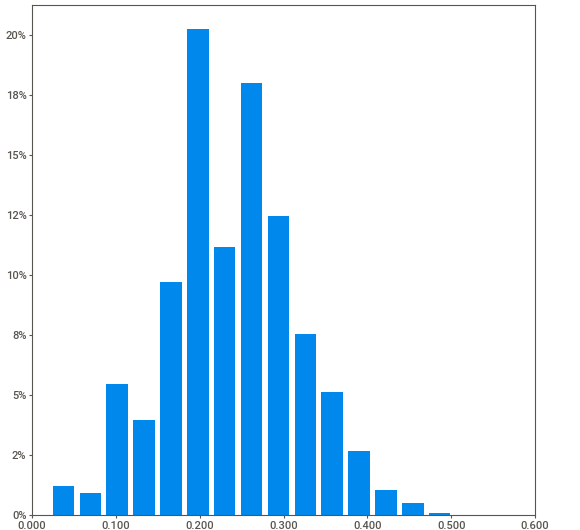
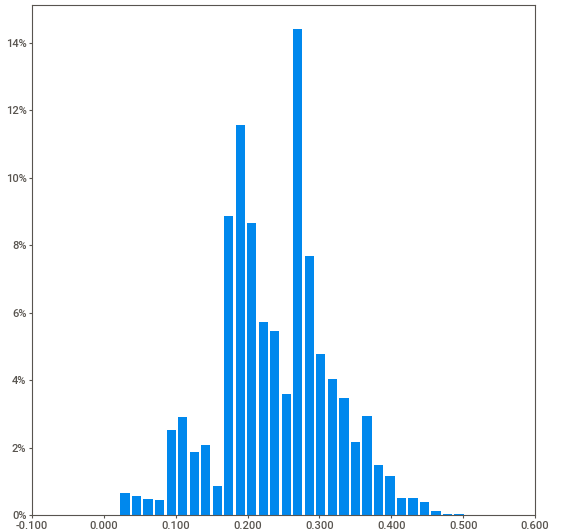
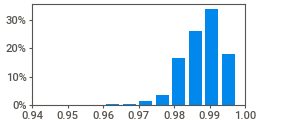
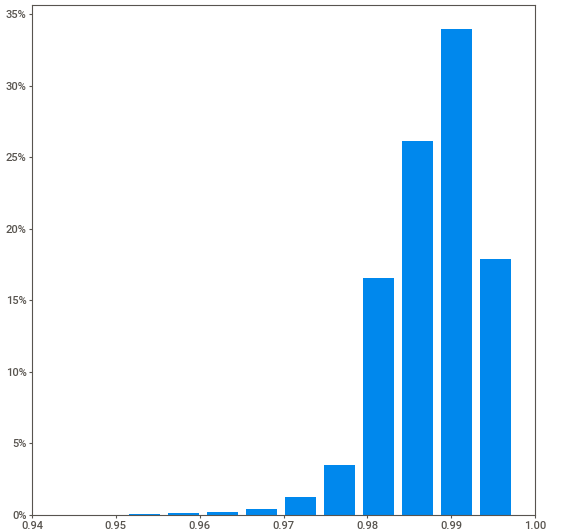
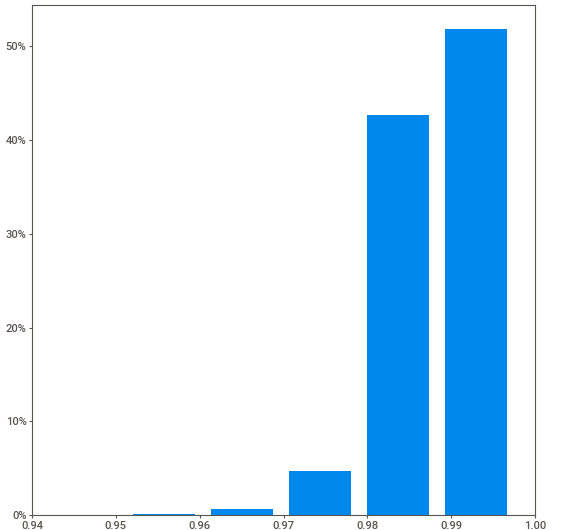
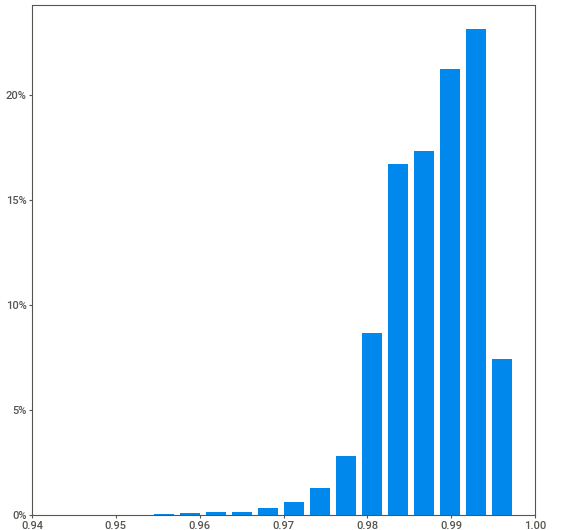
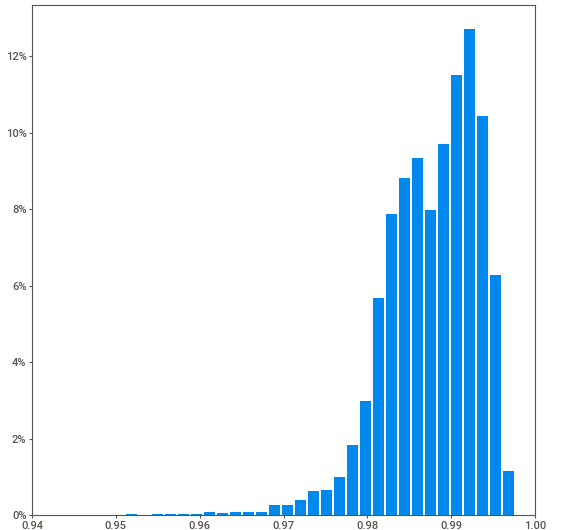
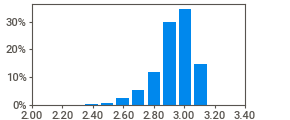
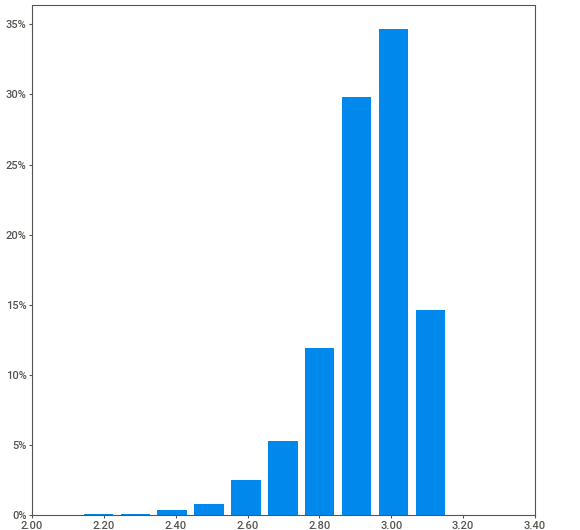
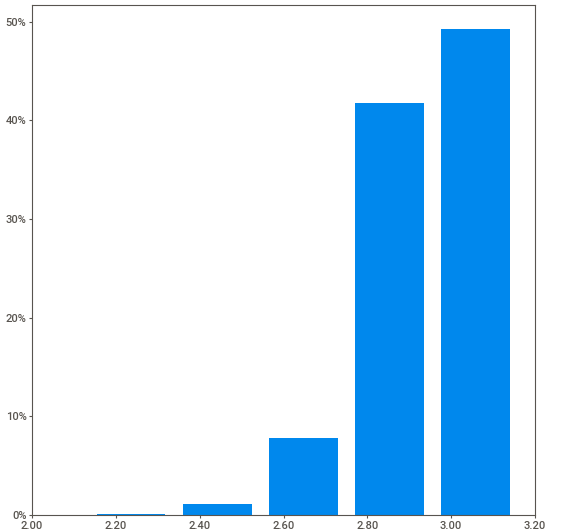
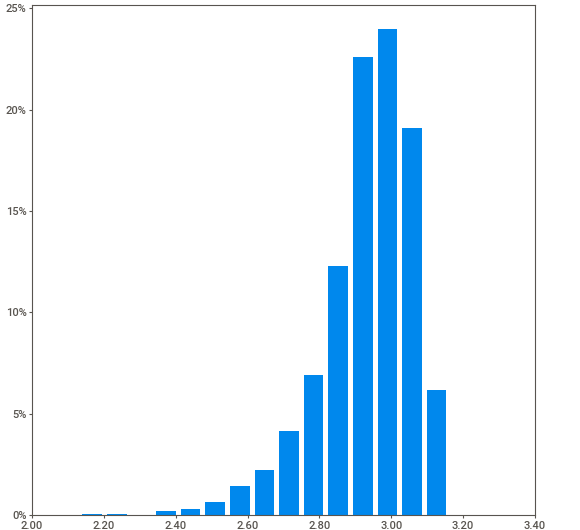
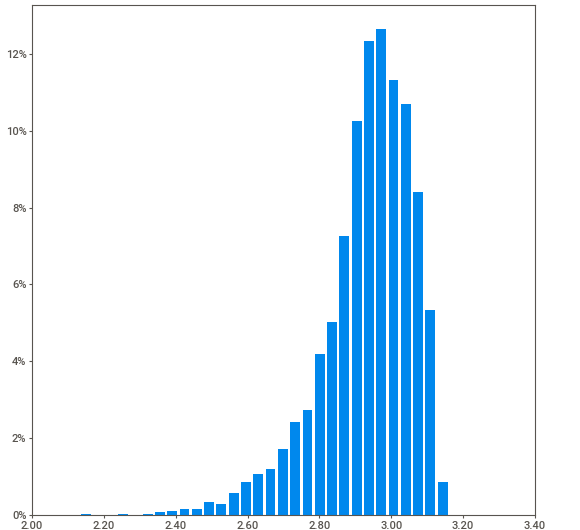
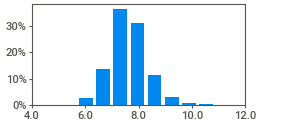
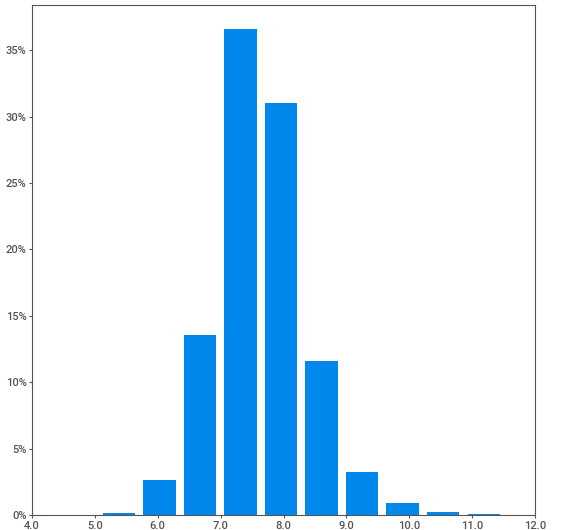
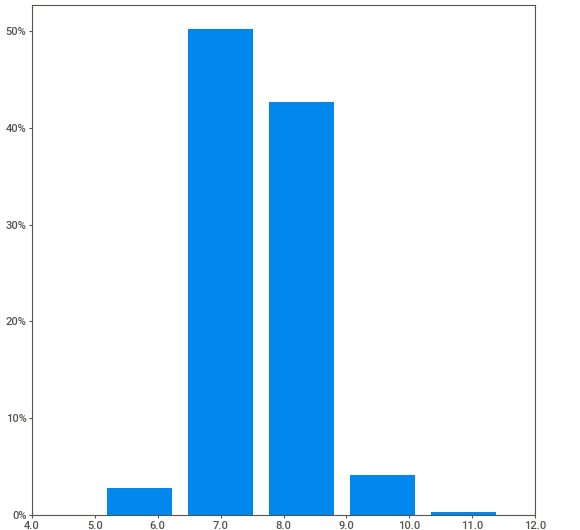
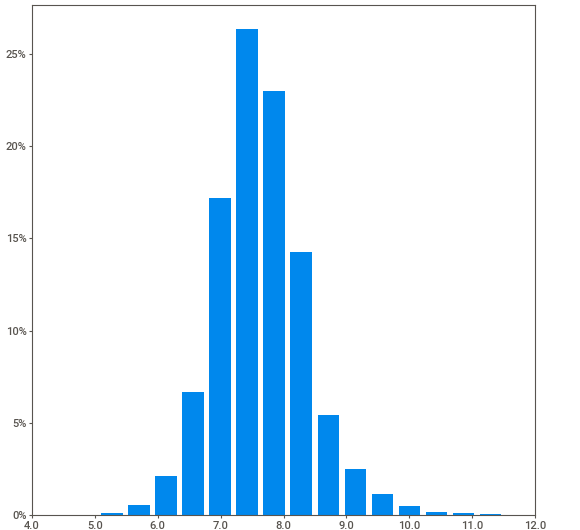
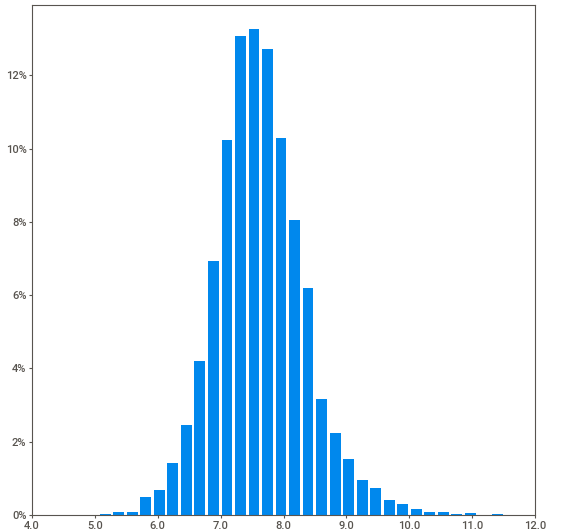
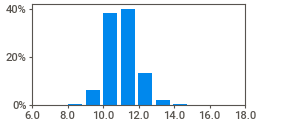
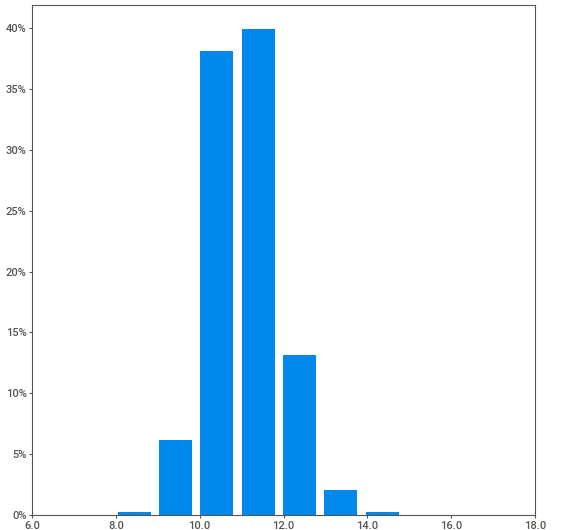
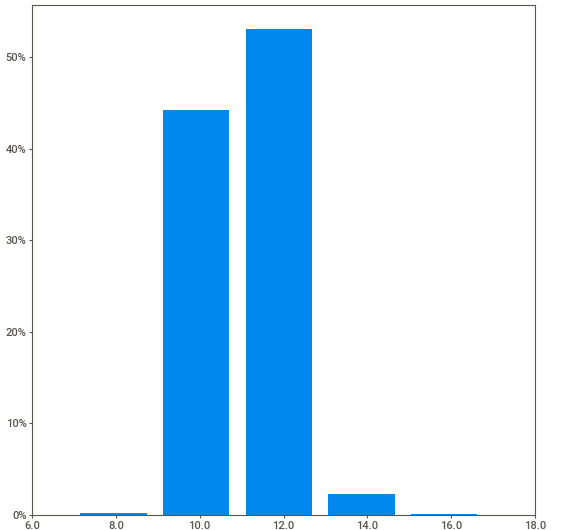
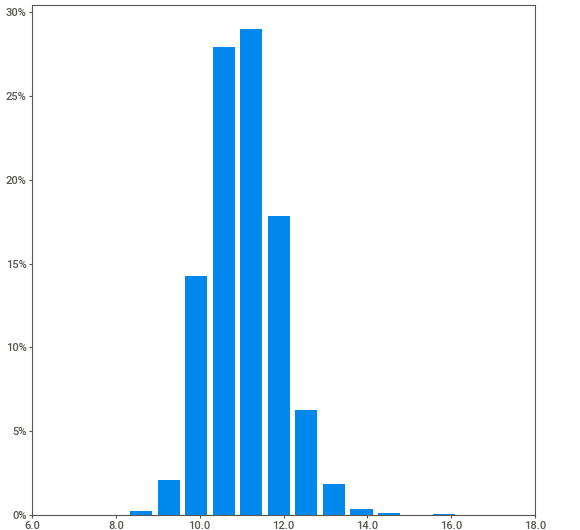
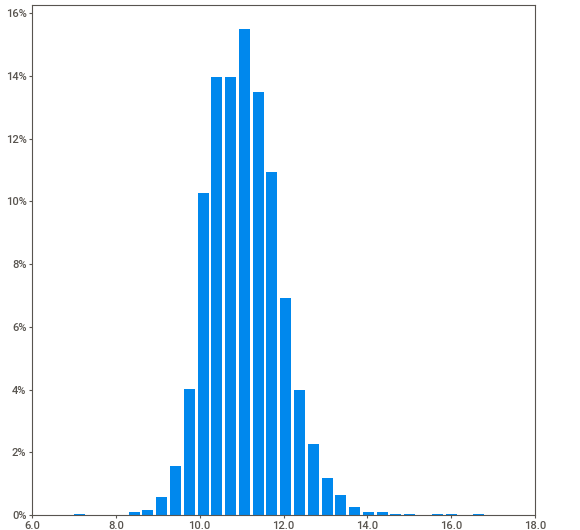
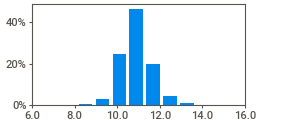
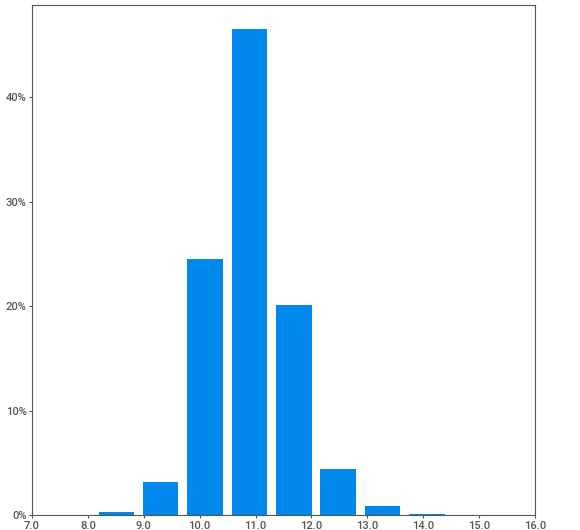
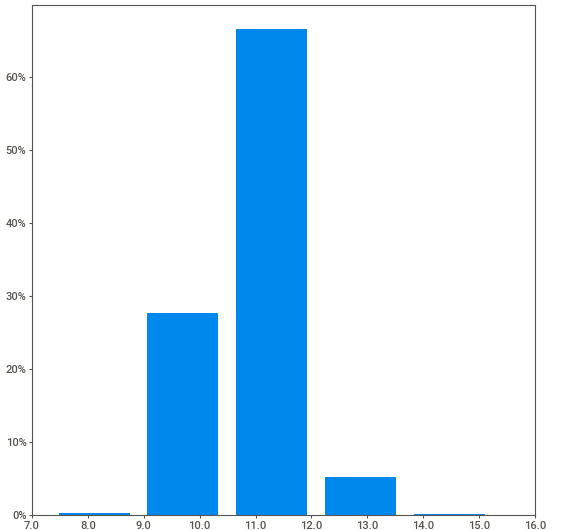
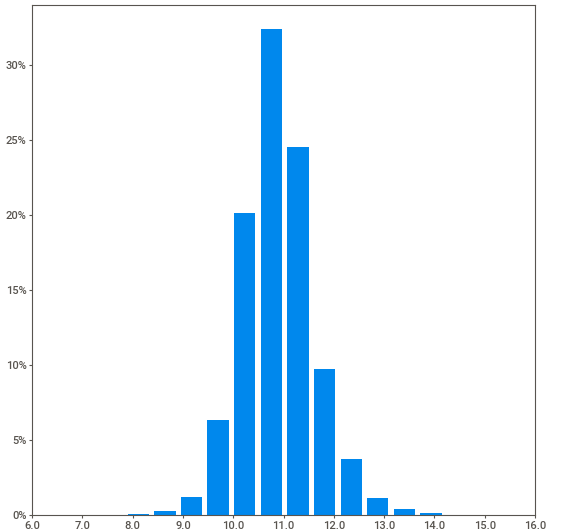
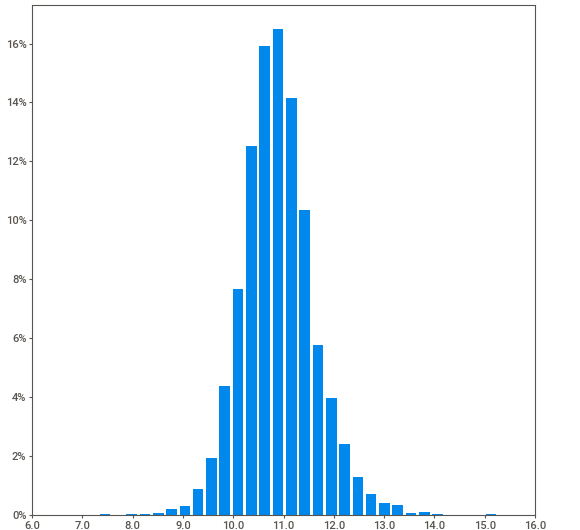
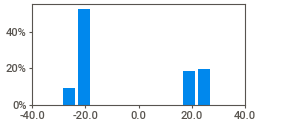
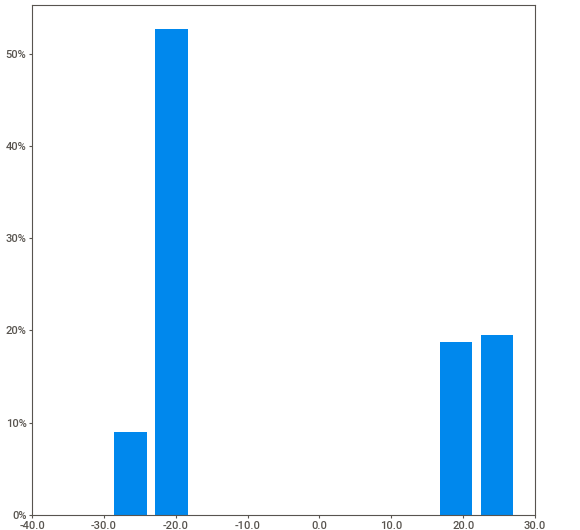
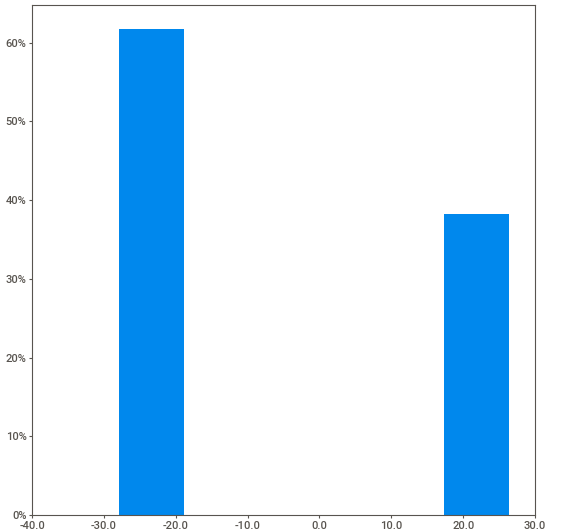
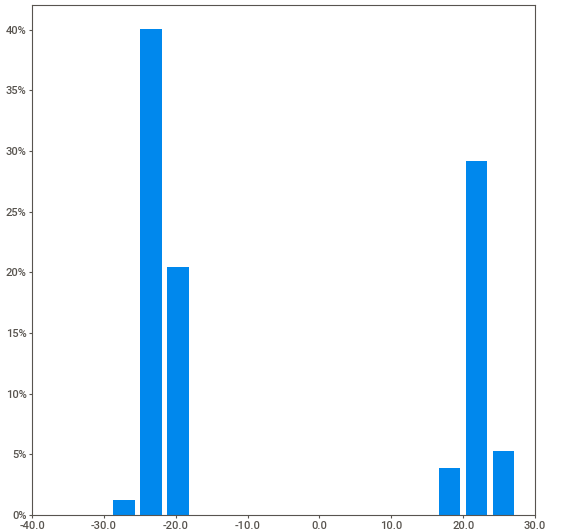
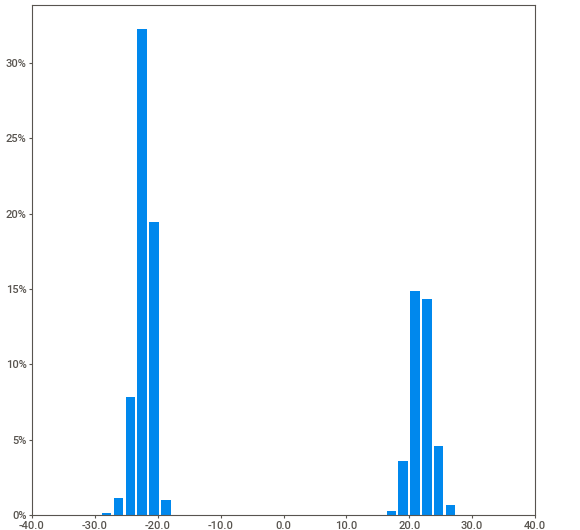
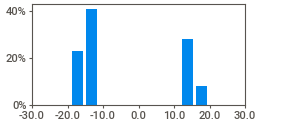
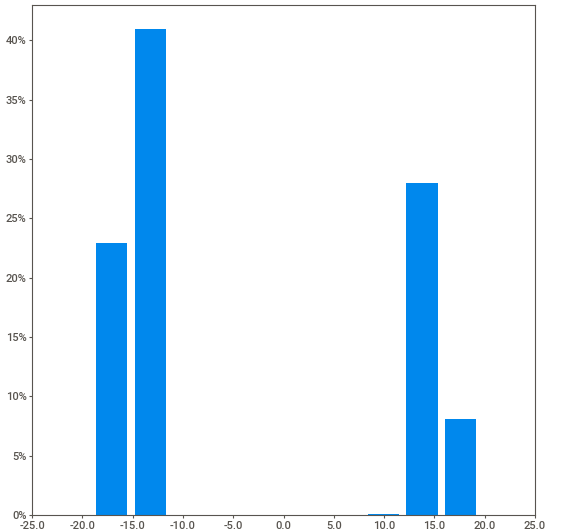
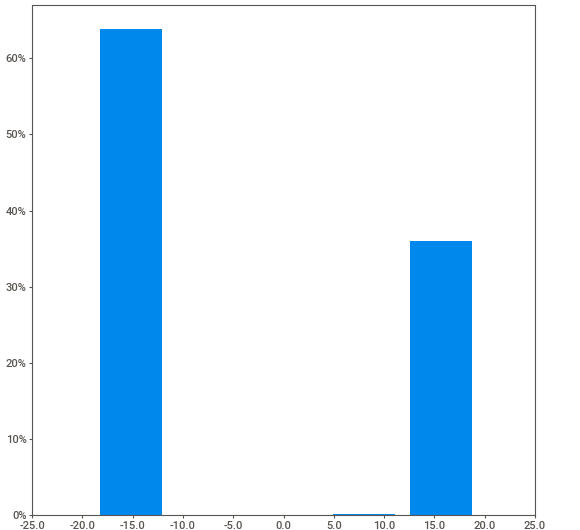
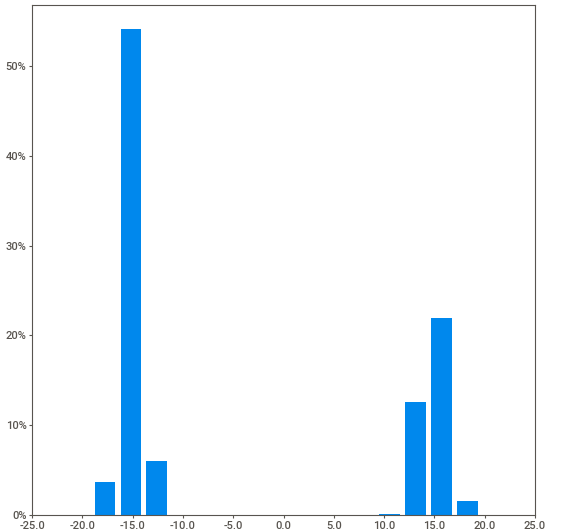
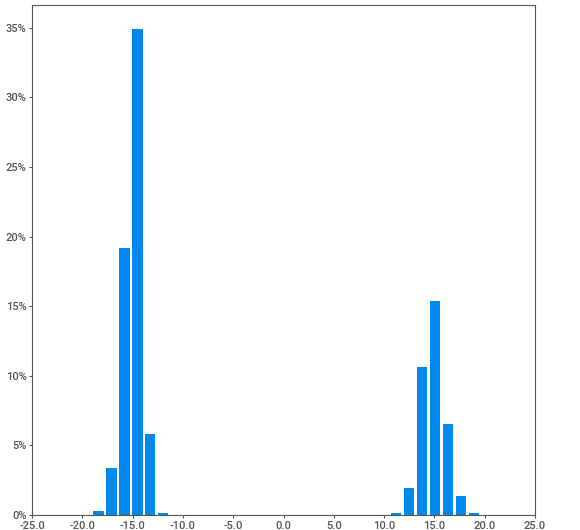
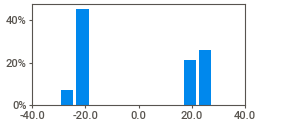
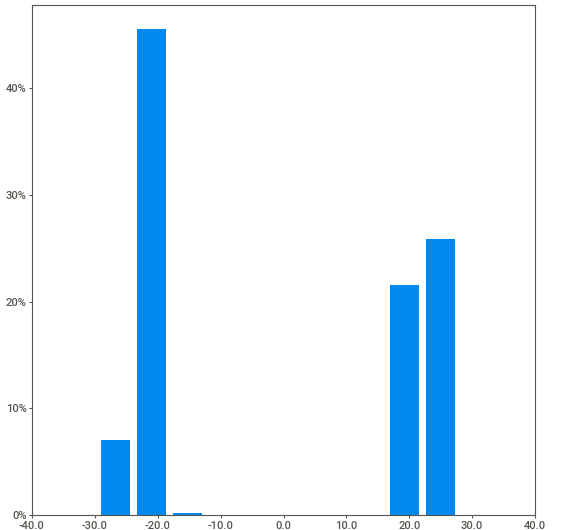
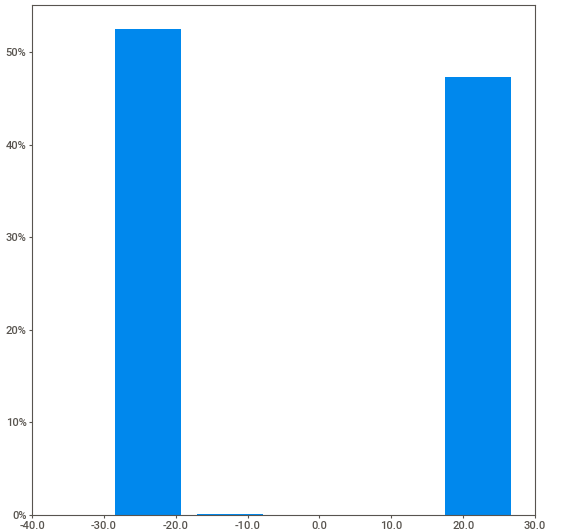
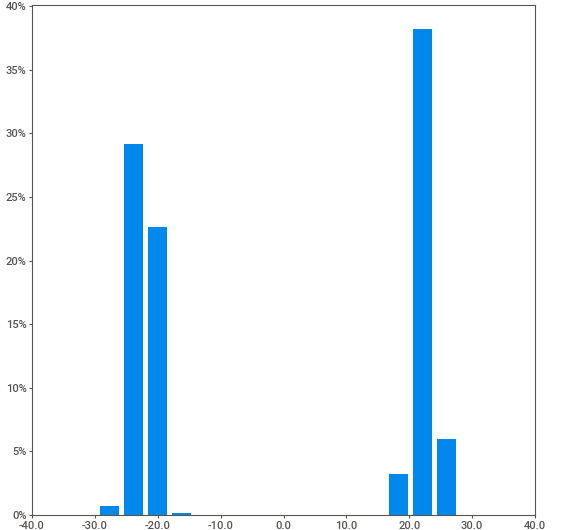
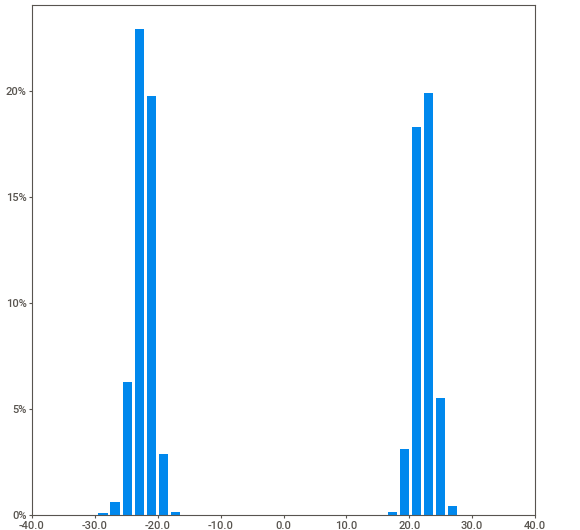
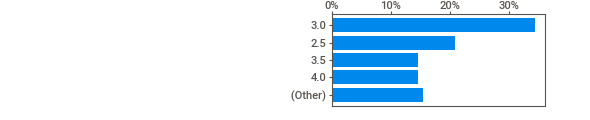
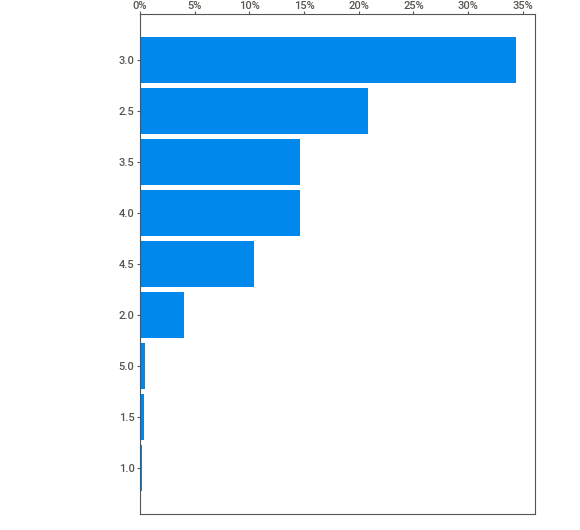
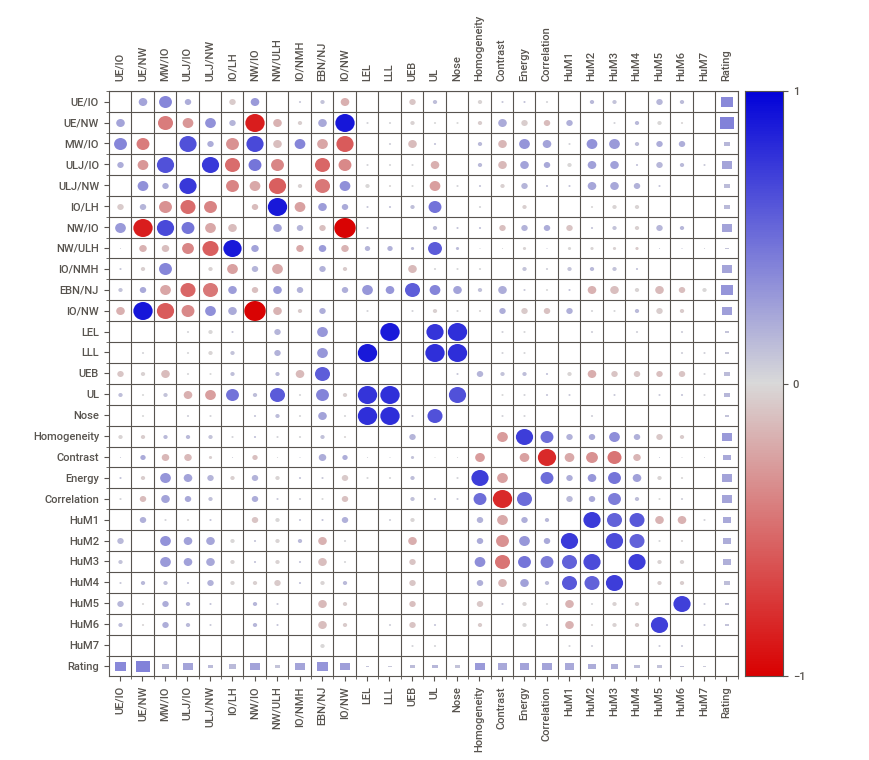
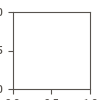

In [ ]:
eda.show_notebook(w=1500, h=300, scale=1)

In [ ]:
corr_matrix=df.corr()
corr_matrix['Rating']

UE/IO          0.327275
UE/NW          0.361372
MW/IO         -0.020906
ULJ/IO        -0.169254
ULJ/NW        -0.026470
IO/LH          0.094451
NW/IO         -0.198511
NW/ULH         0.022083
IO/NMH         0.170826
EBN/NJ         0.268321
IO/NW          0.211126
LEL           -0.007074
LLL           -0.027130
UEB            0.018637
UL             0.094631
Nose          -0.047895
Homogeneity   -0.139657
Contrast       0.110342
Energy        -0.094092
Correlation   -0.100510
HuM1           0.145819
HuM2           0.009208
HuM3          -0.032036
HuM4           0.023001
HuM5           0.038712
HuM6           0.045270
HuM7           0.011723
Rating         1.000000
Name: Rating, dtype: float64

Preparing Data for Classification Analysis

In [ ]:
X=df.drop(['Rating','Image Name'],axis=1)
Y=df.Rating

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.15, random_state = 1)

In [ ]:
cols = X_train.columns

In [ ]:
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
np.isnan(X_train_scaled).sum()

0

In [ ]:
X_train_scaled_pd = pd.DataFrame(X_train_scaled,columns=cols)
X_train_scaled_pd

,UE/IO,UE/NW,MW/IO,ULJ/IO,ULJ/NW,IO/LH,NW/IO,NW/ULH,IO/NMH,EBN/NJ,...,Contrast,Energy,Correlation,HuM1,HuM2,HuM3,HuM4,HuM5,HuM6,HuM7
0,0.174355,-0.095558,-0.846106,-2.207470,-2.430611,3.309810,0.080532,3.753449,-0.656571,2.861499,...,2.244062,0.424816,-0.759345,0.072240,-0.547236,-0.515791,-0.170867,-0.762713,-0.707705,-0.914619
1,-0.481190,0.220350,-0.116530,-1.013449,-0.781710,3.309810,-0.500833,3.510405,-1.060045,-0.507870,...,-1.026170,1.036004,0.357948,1.181194,2.534757,2.640835,2.076124,1.410390,1.571084,-1.135688
2,0.118605,-1.038361,0.089773,-0.568667,-1.302049,1.243424,1.093188,2.064667,-0.190511,0.746537,...,1.506972,0.373533,-0.958533,-2.833267,-2.264575,-0.610785,-0.768165,1.207736,1.228752,1.003873
3,-1.720672,-0.317618,1.015260,0.268667,0.694011,-1.059901,-0.535296,-1.318900,3.146932,0.289587,...,-0.402503,0.474211,0.701627,0.622212,1.024009,-0.595723,1.409586,-0.839762,-0.824329,1.101218
4,-1.819313,-0.182934,-0.996140,-0.713841,-0.290132,0.211775,-0.705606,-0.022281,-0.201466,0.561773,...,-0.479379,-0.747654,0.306414,0.882675,-0.055431,-0.034156,0.389068,-0.796221,-0.748231,-0.962428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,-0.787281,-0.048722,-0.314883,-0.056334,0.202339,-0.586855,-0.381863,-0.727004,-0.976519,-1.063268,...,-0.843944,-0.752281,0.859780,-0.830741,-1.144360,1.216348,0.220807,-0.817864,-0.724861,1.077798
4657,-0.025169,-0.625251,1.789654,1.565679,1.175784,-1.060528,0.547125,-0.849270,-0.775278,-1.300870,...,-0.484678,1.726956,0.644451,-0.444031,0.391349,0.284260,-0.254925,1.248513,1.320058,1.093842
4658,-0.450200,1.611990,-1.123170,-1.178885,-0.121285,1.356252,-1.603154,0.543822,-0.119330,1.003136,...,-0.991825,0.480834,1.119297,0.891549,-0.091055,0.520295,0.579935,-0.816431,-0.762338,-0.983700
4659,-1.472245,-0.473653,-1.219155,-0.515786,-0.390048,-0.330013,-0.271344,-0.456555,-0.455823,-0.058867,...,-0.843172,2.041647,1.248785,0.670426,-0.088051,-0.192030,-0.423041,-0.752560,-0.706157,1.037551


In [ ]:
X_test_scaled_pd = pd.DataFrame(X_test_scaled,columns=cols)
X_test_scaled_pd

,UE/IO,UE/NW,MW/IO,ULJ/IO,ULJ/NW,IO/LH,NW/IO,NW/ULH,IO/NMH,EBN/NJ,...,Contrast,Energy,Correlation,HuM1,HuM2,HuM3,HuM4,HuM5,HuM6,HuM7
0,0.541775,0.139731,-0.278646,-0.663990,-0.737987,-0.135984,0.007250,0.095212,-0.713191,0.634895,...,0.820961,0.416396,-0.293125,-0.179295,-0.377589,-0.821131,-0.127034,-0.745806,-0.758818,-0.937803
1,0.180247,-0.290714,-0.723136,-0.551974,-0.801966,2.706661,0.287533,2.131242,-1.084027,-0.962435,...,-1.087072,1.558533,1.315459,-2.150771,-1.017839,1.159153,-0.143096,-0.774365,-0.733804,-0.975647
2,0.144150,1.767685,-0.960771,0.181068,1.509288,0.069233,-1.518299,-0.502482,0.451946,-0.535619,...,1.600561,-0.639472,-1.629461,0.109546,-0.196772,-0.578078,-0.178181,-0.741053,-0.752707,0.989397
3,-0.724615,-0.023968,-0.806574,-0.336233,-0.108915,-0.017838,-0.383550,-0.156066,-0.393162,0.292837,...,0.004737,-0.802987,-0.494682,-3.140836,-2.354024,-0.094471,-0.972793,-0.738604,1.191194,0.957076
4,0.151036,1.102016,-1.325045,-1.064115,-0.463514,-0.516477,-1.010593,-0.861503,0.710470,1.027554,...,0.313910,-1.551513,-1.339204,0.653779,-0.328970,-0.868148,0.018627,-0.741881,-0.775717,0.995739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,-0.026215,0.602393,-0.471784,-0.718227,-0.327085,0.878536,-0.662071,0.606468,-0.427799,2.041180,...,1.396482,0.813774,-1.319772,-0.856306,-1.338708,0.053703,0.533773,-0.782380,-0.755300,-0.990953
819,-1.218600,-1.613758,0.750027,1.034070,0.176858,-0.831191,1.182530,-0.413167,1.448690,-0.464818,...,0.088452,1.038900,0.644779,-1.561837,-0.505176,-0.311877,-1.466868,1.254700,1.211402,-0.883366
820,-1.589688,1.000287,-0.759049,-0.268242,1.045566,0.571533,-1.618298,-0.381862,0.348563,-0.235850,...,-0.512155,-0.090316,0.289909,1.108589,0.182067,0.501218,1.007706,-0.810943,-0.811505,-1.026903
821,-1.275157,0.130016,0.118066,-0.127871,0.430822,0.795575,-0.766738,0.481231,0.884460,0.331499,...,1.086966,0.615929,-1.189227,-0.165471,-0.359770,-0.421300,1.491508,1.380602,-0.845164,1.066521


In [ ]:
data = pd.concat([X_train_scaled_pd,y_train.set_axis(X_train_scaled_pd.index)],axis=1)
data

,UE/IO,UE/NW,MW/IO,ULJ/IO,ULJ/NW,IO/LH,NW/IO,NW/ULH,IO/NMH,EBN/NJ,...,Energy,Correlation,HuM1,HuM2,HuM3,HuM4,HuM5,HuM6,HuM7,Rating
0,0.174355,-0.095558,-0.846106,-2.207470,-2.430611,3.309810,0.080532,3.753449,-0.656571,2.861499,...,0.424816,-0.759345,0.072240,-0.547236,-0.515791,-0.170867,-0.762713,-0.707705,-0.914619,3.5
1,-0.481190,0.220350,-0.116530,-1.013449,-0.781710,3.309810,-0.500833,3.510405,-1.060045,-0.507870,...,1.036004,0.357948,1.181194,2.534757,2.640835,2.076124,1.410390,1.571084,-1.135688,3.0
2,0.118605,-1.038361,0.089773,-0.568667,-1.302049,1.243424,1.093188,2.064667,-0.190511,0.746537,...,0.373533,-0.958533,-2.833267,-2.264575,-0.610785,-0.768165,1.207736,1.228752,1.003873,3.0
3,-1.720672,-0.317618,1.015260,0.268667,0.694011,-1.059901,-0.535296,-1.318900,3.146932,0.289587,...,0.474211,0.701627,0.622212,1.024009,-0.595723,1.409586,-0.839762,-0.824329,1.101218,4.0
4,-1.819313,-0.182934,-0.996140,-0.713841,-0.290132,0.211775,-0.705606,-0.022281,-0.201466,0.561773,...,-0.747654,0.306414,0.882675,-0.055431,-0.034156,0.389068,-0.796221,-0.748231,-0.962428,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,-0.787281,-0.048722,-0.314883,-0.056334,0.202339,-0.586855,-0.381863,-0.727004,-0.976519,-1.063268,...,-0.752281,0.859780,-0.830741,-1.144360,1.216348,0.220807,-0.817864,-0.724861,1.077798,2.5
4657,-0.025169,-0.625251,1.789654,1.565679,1.175784,-1.060528,0.547125,-0.849270,-0.775278,-1.300870,...,1.726956,0.644451,-0.444031,0.391349,0.284260,-0.254925,1.248513,1.320058,1.093842,3.5
4658,-0.450200,1.611990,-1.123170,-1.178885,-0.121285,1.356252,-1.603154,0.543822,-0.119330,1.003136,...,0.480834,1.119297,0.891549,-0.091055,0.520295,0.579935,-0.816431,-0.762338,-0.983700,4.0
4659,-1.472245,-0.473653,-1.219155,-0.515786,-0.390048,-0.330013,-0.271344,-0.456555,-0.455823,-0.058867,...,2.041647,1.248785,0.670426,-0.088051,-0.192030,-0.423041,-0.752560,-0.706157,1.037551,3.0


In [ ]:
test_data = pd.concat([X_test_scaled_pd,y_test.set_axis(X_test_scaled_pd.index)],axis=1)
test_data

,UE/IO,UE/NW,MW/IO,ULJ/IO,ULJ/NW,IO/LH,NW/IO,NW/ULH,IO/NMH,EBN/NJ,...,Energy,Correlation,HuM1,HuM2,HuM3,HuM4,HuM5,HuM6,HuM7,Rating
0,0.541775,0.139731,-0.278646,-0.663990,-0.737987,-0.135984,0.007250,0.095212,-0.713191,0.634895,...,0.416396,-0.293125,-0.179295,-0.377589,-0.821131,-0.127034,-0.745806,-0.758818,-0.937803,3.0
1,0.180247,-0.290714,-0.723136,-0.551974,-0.801966,2.706661,0.287533,2.131242,-1.084027,-0.962435,...,1.558533,1.315459,-2.150771,-1.017839,1.159153,-0.143096,-0.774365,-0.733804,-0.975647,3.5
2,0.144150,1.767685,-0.960771,0.181068,1.509288,0.069233,-1.518299,-0.502482,0.451946,-0.535619,...,-0.639472,-1.629461,0.109546,-0.196772,-0.578078,-0.178181,-0.741053,-0.752707,0.989397,2.0
3,-0.724615,-0.023968,-0.806574,-0.336233,-0.108915,-0.017838,-0.383550,-0.156066,-0.393162,0.292837,...,-0.802987,-0.494682,-3.140836,-2.354024,-0.094471,-0.972793,-0.738604,1.191194,0.957076,3.0
4,0.151036,1.102016,-1.325045,-1.064115,-0.463514,-0.516477,-1.010593,-0.861503,0.710470,1.027554,...,-1.551513,-1.339204,0.653779,-0.328970,-0.868148,0.018627,-0.741881,-0.775717,0.995739,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,-0.026215,0.602393,-0.471784,-0.718227,-0.327085,0.878536,-0.662071,0.606468,-0.427799,2.041180,...,0.813774,-1.319772,-0.856306,-1.338708,0.053703,0.533773,-0.782380,-0.755300,-0.990953,3.5
819,-1.218600,-1.613758,0.750027,1.034070,0.176858,-0.831191,1.182530,-0.413167,1.448690,-0.464818,...,1.038900,0.644779,-1.561837,-0.505176,-0.311877,-1.466868,1.254700,1.211402,-0.883366,3.0
820,-1.589688,1.000287,-0.759049,-0.268242,1.045566,0.571533,-1.618298,-0.381862,0.348563,-0.235850,...,-0.090316,0.289909,1.108589,0.182067,0.501218,1.007706,-0.810943,-0.811505,-1.026903,2.5
821,-1.275157,0.130016,0.118066,-0.127871,0.430822,0.795575,-0.766738,0.481231,0.884460,0.331499,...,0.615929,-1.189227,-0.165471,-0.359770,-0.421300,1.491508,1.380602,-0.845164,1.066521,3.0


In [ ]:
data['Rating'] = data['Rating'].astype(str)
test_data['Rating'] = test_data['Rating'].astype(str)

Classification using Pycaret

In [ ]:
exp = setup(data, target='Rating')

,Description,Value
0,Session id,2203
1,Target,Rating
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 1.5: 1, 2.0: 2, 2.5: 3, 3.0: 4, 3.5: 5, 4.0: 6, 4.5: 7, 5.0: 8"
4,Original data shape,"(4661, 28)"
5,Transformed data shape,"(4661, 28)"
6,Transformed train set shape,"(3262, 28)"
7,Transformed test set shape,"(1399, 28)"
8,Numeric features,27
9,Preprocess,True


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.4117,0.3616,0.4117,0.3668,0.3610,0.1908,0.2049,0.4460
lr,Logistic Regression,0.4053,0.3662,0.4053,0.3609,0.3529,0.1856,0.1990,0.7090
ridge,Ridge Classifier,0.3982,0.0000,0.3982,0.3110,0.3152,0.1537,0.1771,0.0870
et,Extra Trees Classifier,0.3979,0.3589,0.3979,0.3517,0.3444,0.1663,0.1804,1.2700
lightgbm,Light Gradient Boosting Machine,0.3979,0.3600,0.3979,0.3661,0.3668,0.1889,0.1946,4.7480
gbc,Gradient Boosting Classifier,0.3955,0.3569,0.3955,0.3560,0.3562,0.1799,0.1888,27.5470
xgboost,Extreme Gradient Boosting,0.3927,0.3545,0.3927,0.3601,0.3615,0.1822,0.1881,13.7630
lda,Linear Discriminant Analysis,0.3924,0.3633,0.3924,0.3482,0.3397,0.1693,0.1830,0.1220
qda,Quadratic Discriminant Analysis,0.3694,0.3478,0.3694,0.3479,0.3507,0.1740,0.1766,0.4780
dummy,Dummy Classifier,0.3452,0.2500,0.3452,0.1192,0.1772,0.0000,0.0000,0.1030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Prediction

In [ ]:
preds = predict_model(best_model, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.4204,0.7249,0.4204,0.3786,0.3690,0.2071,0.2236


In [ ]:
preds[['Rating','prediction_label']]

,Rating,prediction_label
0,4,3.0
1,5,3.0
2,2,4.0
3,4,3.0
4,5,4.0
...,...,...
818,5,4.5
819,4,3.0
820,3,2.5
821,4,3.0


Saving Model

In [ ]:
import joblib

In [ ]:
joblib.dump(best_model,'/content/drive/MyDrive/Spechio_Project/Spechio_model_Classification.joblib')

['/content/drive/MyDrive/Spechio_Project/Spechio_model_Classification.joblib']

In [ ]:
#saving sacler
import joblib
scaler_filename = "/content/drive/MyDrive/scaler.save"
joblib.dump(scaler, scaler_filename)

['/content/drive/MyDrive/scaler.save']